# Table of Contents

1. [Project Outline](#project-outline)
2. [Introduction](#introduction)
    1.[Project Objectives](#project-objectives)
3. [Libraries](#libraries)
4. [CO2 Analysis](#co2-analysis)
5. [Temperature Analysis](#temperature-analysis)
6. [Methane](#methane)
7. [Irish Temperature](#irish-temperature)
8. [Dataset Creation](#dataset-creation)
9. [Correlation](#correlation)
10. [Lag/Lead Analysis](#lag/lead-analysis)
11. [Regression](#regression)
12. [Future Predictions](#future-predictions)
13. [Conclusion](#conclusion)
14. [Referneces](#references)


# Project Outline

An analysis of paleo-present climate data
  - Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
  - Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
  - Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
  - Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
  - For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
  - Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
  - Comment on accelerated warming based on very latest features (e.g. temperature)

# Introduction

Global warming has been a topic at the forefront of newstories and science papers for the last twenty years. Just in the last week 2023 was confirmed as the warmest year on record (since 1850)[[1]](https://edition.cnn.com/2024/01/09/climate/temperature-rise-2023-climate-copernicus-intl/index.html#:~:text=Global%20warming%20leaped%20to%20its,term%20warming%20of%201.5%20degrees.) At the heart of these discussion is the impact of human society on this warming.  At this point there is an established scientific consensus that the current changes in Earths climate are chiefly down to human activity. 

2023 had a temperature anomaly of 1.48 degrees Celsius. [[2]](https://climate.copernicus.eu/copernicus-2023-hottest-year-record#:~:text=Global%20surface%20air%20temperature%20highlights%3A&text=2023%20marks%20the%20first%20time,than%202%C2%B0C%20warmer.) In 2015 countries came to together to form the Paris Agreement to try and minimise further global warming. The target agreed was to limit global temperature anomaly to 1.5 degrees. 

In order to minimise global warming you need to know what is causing it.  It is now agreed that increasing greenhouse gas concentrations in the biosphere is a main culprit. These are molecules like carbon dioxide (CO2), Methane(CH4) and others that prevent heat leaving the atmosphere [[3]](https://climate.nasa.gov/faq/19/what-is-the-greenhouse-effect/). This affect has been studied by examining the relationship between the concentration of these molecules and the global temperature going back hundreds of thousands of years.

The European Project for Ice Coring in Antarctica Dome ice core (EPICA) is a project that has been reconstructing the cliamte and atmospheric record going back 800,000(kyrs) years.[[4]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2014GL061957).

This was achieved by drilling and extracting ice cores and measuring the levels of certain atmospheric molecules such as Carbon Dioxide (CO2), Methane (CH4) and deuterium which can be used as a proxy for temperature. There are bubbles in the ice containing air from long ago, using mass spectrometers the concentrations of these molecules in the air can be determined.  The deeper you drill the further back in time you are looking.

Two stations were set up in Concordia Station at Dome C and Kohnen Station Antarctica. The drilling process began in 2004. They were able to obtain core samples at 3270.2m deep. At this depth the samples date back 800kyr[[5]](https://en.wikipedia.org/wiki/European_Project_for_Ice_Coring_in_Antarctica).

There have been many other similar projects such as at Vostok station [[6]](https://www.ncei.noaa.gov/access/paleo-search/study/2443), a Russian research station in Antarctica. Here they obtained samples dating back 420kyr.

By examining the levels of greenhouse gases in the samples they were able to show how the atmosphere changes over time. As deuterium can be used as an indicator for temperature, they have been able to plot the levels of Co2 and other greenhouse gases against the temperature at the time. This allows an examination of any correlation that occurs between them. 

![graph showing relationship between greenhouse gases and temperature](https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png)



# Project Objectives

The purpose of this project is to examine the datasets for these greenhouse gases, comparing against each other and looking at correlation with temperature over the last 800kyrs. In addition I will look at this in an Irish context by reviewing this data that has been collected in Ireland and how it relates to the global picture. 

From understanding the correlation between these variables historically, we can then use this to predict future temperatures.



# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




# CO2 Analysis

I was provided with two datasets for CO2 levels going back 800kyrs. Part of the project is to compare and contrast these.

The first dataset is from  the paper "High-resolution carbon dioxide concentration record 650,000–800,000 years before present" by Leuthi et al, that was published in the journal Nature in 2008 [[7]](https://www.nature.com/articles/nature06949). This article was presenting a new continuous CO2 record back 800kyr before present (present in these articles is always the date 1st January 1950.). The previous longest record had data covering the last 650,000kyr. This article was accounting for the lowest ice cores from Dome C.

First I will import this dataset to  the jupyter notebook. I have created a new folder called 'Datasets Used' withing this repository. This will contain any source datasets that I use during this project.

The dataset from this paper is downloaded as "41586_2008_BFnature06949_MOESM31_ESM.xls". It had a number of different excel sheets for each ice core project and had one sheet called Composite that amalgamated them together. I have saved this sheet as a separate CSV file called nature_dataset.csv to allow easy import.




On the EPA website I found a database that has amalgamated the results from previous studies (EPICA Dome C, Vostok, Siple Station, Antarctica, Mauna Loa, Hawaii, Barrow, Alaska, Cape Matatula,  American Samoa, South Pole, Antarctica, Cape Grim, Australia, Lampedusa Island, Italy, Shetland Islands, Scotland) of Co2 atmosphere levels going back to 800kyr. The most recent datapoints were from 2015. As the Mauna Loa data is updated yearly I added 2016-2022 to the spreadsheet myself. 


As there are a number of overlaps between different studies, in cases where there are multiple values I will attempt to obtain an average value for that year. 

In [29]:
#import dataset from Nature

nature = pd.read_csv('Datasets Used/Nature_dataset.csv', skiprows=6,) #the data we want begins on line 7
nature = nature.iloc[:, :2]  # only need the first two columns
nature.columns = ['Year', 'CO2(ppmv)'] #re-naming column 1


In [30]:
# checking it looks as expected

nature.head() 


,Year,CO2(ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


From looking at this dataset the unit of time is presented as years before present. Again present is defined as 1950. So for example the most recent sample is from 1813(1950-137). Co2 levels are recorded as 'ppmv' which is parts per million by volume

Text(0.5, 1.0, 'CO2 levels over the last 800kyrs')

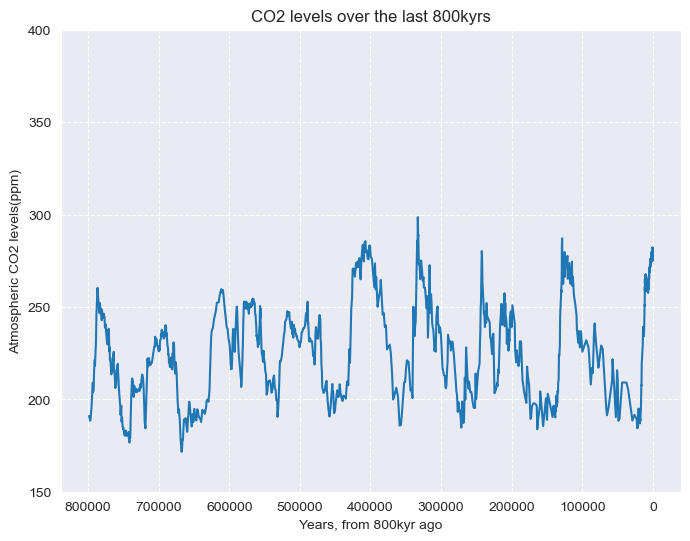

In [34]:
# Plot the CO2 values over time

plt.figure(figsize=(8, 6)) 

sns.lineplot(nature, x = "Year", y = "CO2(ppmv)",) 

sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'}) #make it easier to read
plt.gca().invert_xaxis() # reversing x axis so most recent is furthest to the right

plt.ylim(150, 400) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Atmospheric CO2 levels(ppmv)')
plt.xlabel('Years, from 800kyr ago')
plt.title("Leuthi et al, dataset")

There is also another dataset provided by The Intergovernmental Panel on Climate Change ("IPCC"). This dataset has atmospheric Co2 values from 800ky bp up until 2020. This is an amalgamation of previous studies just like the Nature dataset but from eyeballing it, the values don't seem to be the same. For example IPCC has 1900 values going up until the year 2000 while Nature has 1095 values and only goes up until 1813. I will plot this dataset as well to see if it matches the previous plot.

In [145]:
#import dataset from IPCC
#IPCC dataset is downloaded as "grl52461-sup-0003-supplementary.xls" and had one sheet called Composite. I have saved this as a seperate CSV file called 'grl52461-sup-0003-supplementary.csv' to allow easy import

ipcc = pd.read_csv('Datasets Used/IPCC_dataset.csv', skiprows=14,) #the data we want begins on line 7
ipcc = ipcc.iloc[:, :3] # only want the first 3 columns
ipcc.columns = ['Year', 'CO2(ppmv)', 'sigma mean CO2 (ppmv)'] #re-naming column 1
ipcc.head()

,Year,CO2(ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


Text(0.5, 1.0, 'IPCC dataset')

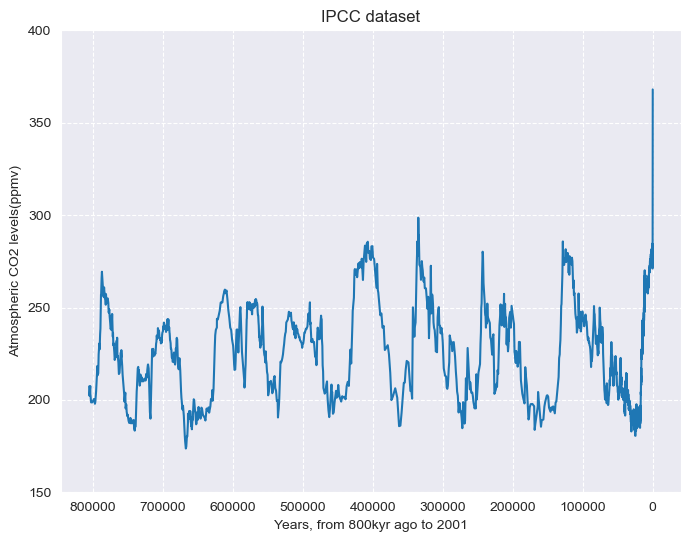

In [148]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(ipcc, x = "Year", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right

#sns.regplot(x = ipcc['Year'], y = ipcc['CO2(ppmv)'], scatter=False, color='red', label='Trendline')

plt.ylim(150, 400) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Atmospheric CO2 levels(ppmv)')
plt.xlabel('Years, from 800kyr ago to 2001')
plt.title("IPCC dataset")

**DATA Comparison** 

Both datasets get their data from ice core sampling. I believe they are both using the same source samples but have aged them slightly differently. To confirm this I am going to plot them both on one plot and compare them.

To do this I first need to normalise the year values. 
In all of these datasets "present" is the year 1950. I will attempt to normalise them from the year 2023.

Nature goes up to the year 137bp this equates to the year 1813.
Ipcc goes up to -51bp which should equate to 2001.

In [48]:
nature['Corrected Years'] = 1950 -nature['Year'] #creating a new column with the correct year for each sample
nature = nature.iloc[:, [1, 2]]
nature.head()

,CO2(ppmv),Corrected Years
0,280.4,1813
1,274.9,1682
2,277.9,1671
3,279.1,1555
4,281.9,1546


In [49]:
ipcc['Corrected Years'] = 1950 -(ipcc['Year'].astype(int)) #creating a new column with the correct year for each sample
ipcc = ipcc.iloc[:, [1, 3]]
ipcc.head()


,CO2(ppmv),Corrected Years
0,368.02,2001
1,361.78,1998
2,359.65,1996
3,357.11,1994
4,353.95,1993


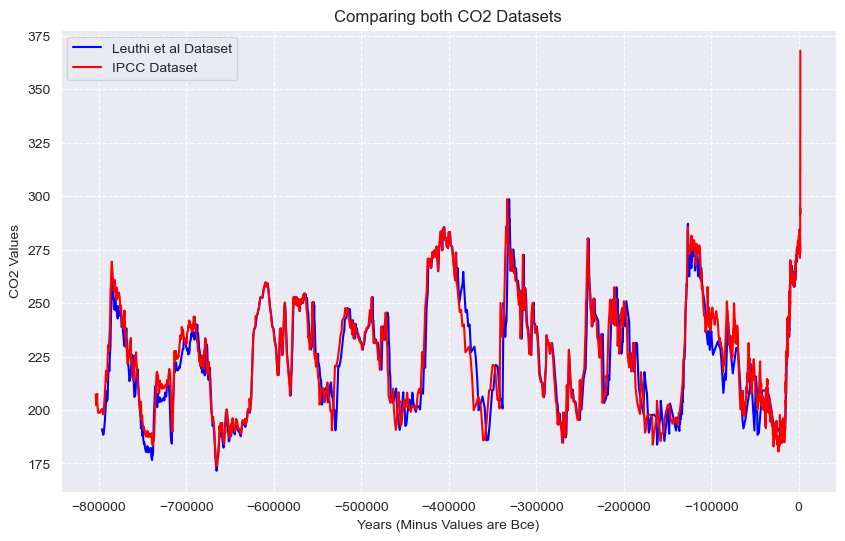

In [51]:
# Assuming 'Time' is the common index in both DataFrames
plt.figure(figsize=(10, 6))

# Plotting using Seaborn lineplot
sns.lineplot(data=nature, x = "Corrected Years", y = "CO2(ppmv)", color='blue', label='Leuthi et al Dataset')
sns.lineplot(data=ipcc, x = "Corrected Years", y = "CO2(ppmv)",  color='red', label='IPCC Dataset')

final_x_value = ipcc['Corrected Years'].iloc[-1]

# Set labels and title
plt.xlabel('Years (Minus Values are Bce)')
plt.ylabel('CO2 Values')
plt.title('Comparing both CO2 Datasets')

# Show legend
plt.legend()

We can see the values are very similar and follow the same trend. The IPCC dataset has included more recent datapoints going up to 2001. For the overlapping periods it seems some parts of them share the same CO2 values (y-axis value) but the year of sampling (x-axis) is slightly off (e.g. between -400kyr and -300kyr). However, in some other parts the inverse seems to be true (e.g. between -800kyr and -650kyr).  I believe as stated previously they are drawing their data from the same ice core samples but are using different methodology to date them which is why they don't line up identically. 

From reading the metadata of the IPCC report, it seems that there has been a re-evaluation of the CO2 levels in the bottom 200m of ice core at Dome C. This depth covers the years 800kyr - 600kyr ago. They used a different air extraction method to get a more accurate result [[8]](https://app.bibguru.com/p/0a9a7ecc-64d4-43e9-b7eb-186ab8b68ce5). This would explain the difference observed above for this period. 

As the IPCC dataset has more 805 more datapoints including both older and more recent years than the Nature dataset, this is the one we will work with going forward.

The IPCC dataset has compiled results from various studies at Law Dome [[9]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/jgrd.50668), Dome C (Dome Concordia),[[10]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/2004GL020338) West Antactic Ice Sheet [[11]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2011GB004247), Siple Dome [[12]](https://www.nature.com/articles/ncomms4723.pdf), EPICA Dronning Maud Land [[13]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2015PA002874) and Vostok Station [[14]](https://escholarship.org/content/qt7rx4413n/qt7rx4413n.pdf). All of these locations are in Antarctica.


To bring this plot up to modern day (or as close as possible), we first need to find a dataset that has the results for CO2 levels from 2001-2023 in the same location. 

While Antarctica has shown a consistent upward trend in CO2 levels, the same is true for the rest of the world. Given its remoteness Antarctica is the last place to register the impacts of increasing emissions from fossil fuels [[15]](https://www.noaa.gov/south-pole-last-place-on-earth-to-pass-global-warming-milestone#:~:text=South%20Pole%20is%20last%20place%20on%20Earth%20to%20pass%20global%20warming%20milestone,-Focus%20areas%3A&text=The%20Earth%20passed%20another%20unfortunate,time%20in%204%20million%20years.). Therefore it is important that when comparing data from multiple different studies, the location remains the same. 

The Global Monitoring Laboratory (GML) of the National Oceanic and Atmospheric Administration (NOAA) produce this data which contains  atmospheric CO2 (Dry Air Mole Fractions) measurements at Barrow, Alaska (BRW); Mauna Loa, Hawaii (MLO); American Samoa (SMO); and South Pole (SPO), from 1973-2022. 

In order to use comparable data and keep the location as similar as possible, I will use the South Pole data. This dataset has been downloaded from the GML website[[16]](https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/) as a .txt file. For the ease of importing it to this notebook I converted the South Pole file to a .csv and saved it as "co2_spo_surface_MonthlyData.csv" in my 'Datasets Used' folder. 

In [55]:
#reading in the South Pole (spo))dataset

spo_co2 = pd.read_csv('Datasets Used/co2_spo_surface_MonthlyData.csv', skiprows=2) #the data we want begins on line 7
spo_co2 = spo_co2.iloc[:, [1, 2, 10]] # only columns needed

spo_co2.head()

,year,month,value
0,1974,1,-999.99
1,1974,2,-999.99
2,1974,3,-999.99
3,1974,4,-999.99
4,1974,5,-999.99


According to the metadata for this dataset "Missing data will have a value of -999.99 for the mole fraction."

These need to be removed from the dataset. 

In [56]:
# Replace any instance of -999.99 to NaN which we will then remove
spo_co2.replace(-999.99, pd.NA, inplace=True) 
spo_co2.dropna(inplace=True) #removing NaN values

spo_co2.head()

# https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=a%20Specific%20Column-,One%20common%20approach%20to%20handle%20null%20values%20is%20to%20delete,values%20in%20the%20specified%20column.
# https://stackoverflow.com/questions/33643843/cant-drop-nan-with-dropna-in-pandas

,year,month,value
12,1975,1,328.19
13,1975,2,328.22
14,1975,3,328.88
22,1975,11,330.6
23,1975,12,329.72


In [57]:
#This dataset has a recorded value for every month. To remain consistent with our previous datasets, this will be averaged into an annual value.

spo_co2 = spo_co2.groupby('year')['value'].mean().reset_index() #averaging monthly values into a singular annual datapoint
spo_co2.tail()

# https://stackoverflow.com/questions/65471540/get-monthly-average-in-pandas

,year,value
42,2018,405.218333
43,2019,407.631667
44,2020,409.990833
45,2021,412.0725
46,2022,414.42


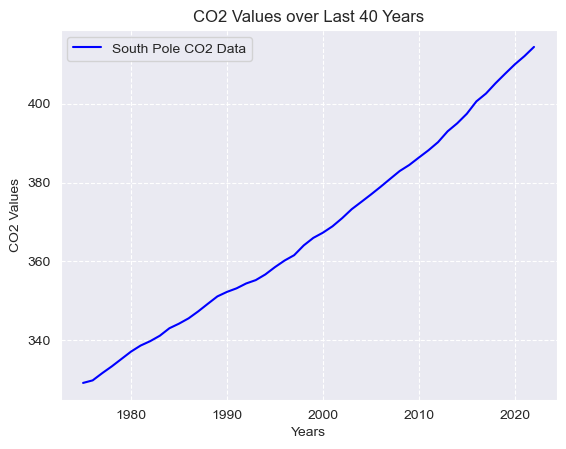

In [60]:
# Plotting using Seaborn lineplot
sns.lineplot(data=spo_co2, x = "year", y = "value", color='blue', label='South Pole CO2 Data')


# Set labels and title
plt.xlabel('Years')
plt.ylabel('CO2 Values')
plt.title('CO2 Values over Last 40 Years')

# Show legend
plt.legend()

While the IPCC dataset has values as recent as 2001, the samplings can be sporadic as they are dated from the ice-cores. The above southpole dataset relies on data recorded contemporaneously at stations in Antarctica. As such they are much more consistent, and probably accurate. 

In creating a continuous CO2 record, we will use the south pole from 1975 and append it onto the IPCC dataset. 

In [61]:
# First we need to cleanse the data so its fits the same format


spo_co2.rename(columns = {'value': 'CO2(ppmv)', 'year': 'Corrected Years'}, inplace=True) # i want consistent headings
#spo_co2 = spo_co2[::-1] # reverse the order so it goes from recent to older. 

spo_co2.head()

,Corrected Years,CO2(ppmv)
0,1975,329.122
1,1976,329.769167
2,1977,331.608333
3,1978,333.333636
4,1980,337.076667


In [62]:
# the ipcc dataset also has double values in some years. I want to only have one value per year so I will average these values.

ipcc = ipcc.groupby('Corrected Years')['CO2(ppmv)'].mean().reset_index()
ipcc.head()


,Corrected Years,CO2(ppmv)
0,-803718,207.29
1,-803182,202.23
2,-802572,204.86
3,-802059,207.50
4,-801975,202.92


In [64]:
ipcc_1974 = ipcc.head(1828) # cutting off at 1974
ipcc_1974.tail()

,Corrected Years,CO2(ppmv)
1823,1968,323.183333
1824,1969,324.710000
1825,1970,325.607500
1826,1972,329.385000
1827,1974,331.550000


In [65]:
complete_co2 = pd.concat([ipcc_1974, spo_co2], ignore_index = True)
complete_co2['Corrected Years'].astype(int)
complete_co2.tail()

,Corrected Years,CO2(ppmv)
1870,2018,405.218333
1871,2019,407.631667
1872,2020,409.990833
1873,2021,412.0725
1874,2022,414.42


Text(0.5, 1.0, 'Continuous record from 800kyrs ago to 2022')

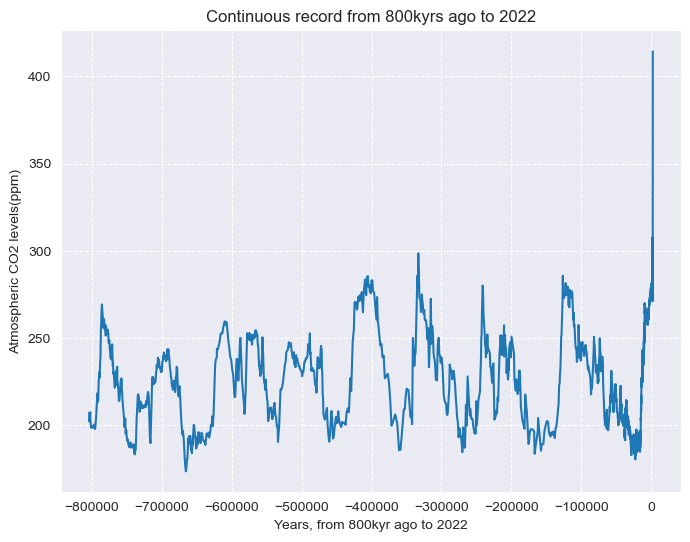

In [67]:
# Plot the continuous record from 800kyrs ago to 2022 

plt.figure(figsize=(8, 6))  

sns.lineplot(complete_co2, x = "Corrected Years", y = "CO2(ppmv)",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr ago to 2022')
plt.title("Continuous record from 800kyrs ago to 2022")

We now have a dataset for CO2 levels in Antarctica going from 800kyr ago right up to 2022.

**Industrial Revolution Effect**

While the industrial revolution began in the mid 1700s, [[16]](https://en.wikipedia.org/wiki/Industrial_Revolution) this was localised to Britian and it wasnt until the 1830s-1840s that it had spread around the western hemisphere. While heavy industry and use of fossil fuels were still in their infancy on a global scale, we can use this as a point of division to compare before and after.

In [68]:
pre_inds_rev = complete_co2.head(1741) #from 800kyr be to 1841ce
pre_indust_average = pre_inds_rev["CO2(ppmv)"].mean()

#complete_co2.tail(134)
post_inds_rev = complete_co2.tail(134) # from 1844-2022
present_average = post_inds_rev["CO2(ppmv)"].mean()

increase = float((pre_indust_average/present_average)*100)

print(f'The average atmospheric CO2 levels from 800kyr bp up until 1840 was {pre_indust_average:.2f}ppm. While in the period 1841-2023 the average atmospheric CO2 levels had risen to {present_average:.2f}ppm, an increase of {increase:.2f}%')

The average atmospheric CO2 levels from 800kyr bp up until 1840 was 228.64ppm. While in the period 1841-2023 the average atmospheric CO2 levels had risen to 325.33ppm, an increase of 70.28%


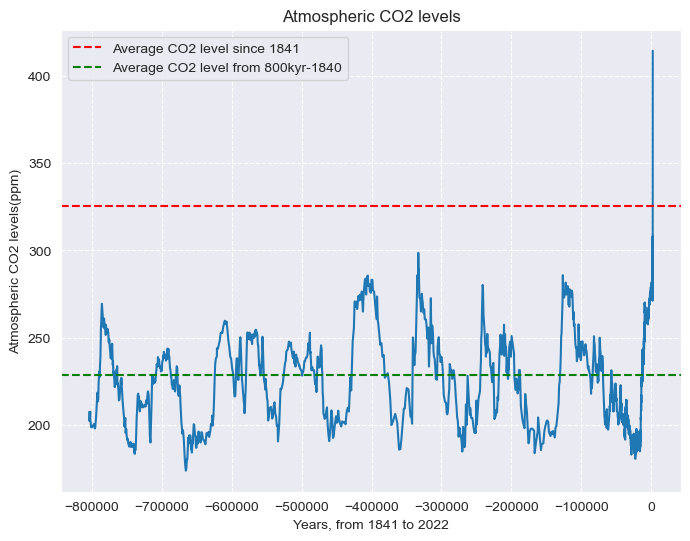

In [69]:
# The same plot as above but with pre-industrial and post-industrial averages highlighted
plt.figure(figsize=(8, 6))  

sns.lineplot(complete_co2, x = "Corrected Years", y = "CO2(ppmv)",)

sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

plt.axhline(y=present_average, color='red', linestyle= '--', label='Average CO2 level since 1841')
plt.axhline(y=pre_indust_average, color='green', linestyle= '--', label='Average CO2 level from 800kyr-1840')
plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 1841 to 2022')
plt.title("Atmospheric CO2 levels")
plt.legend()

# https://www.statology.org/matplotlib-average-line/

In the above plot we can see the average CO2 levels for the last 800k years. To highlight the massive increase since the industrial revolution I have added the pre-industrial CO2 average as a dashed green line and the post-industrial revolution average. This is an increase of 70.3%

# Temperature Analysis

The concentration of greenhouse gases can be determined directly from the ice core samples. Bubbles of air in the ice can be examined to determine the make-up of this air. You cannot do the same for temperature.  However, the temperature at the time can be inferred by the isotopic composition of the water molecules released by melting the ice core [[17]](https://www.scientificamerican.com/article/how-are-past-temperatures/).

"The isotopes of particular interest for climate studies are 16O (with 8 protons and 8 neutrons that makes up 99.76 percent of the oxygen in water) and 18O (8 protons and 10 neutrons), together with 1H (with one proton and no neutrons, which is 99.985 percent of the hydrogen in water) and 2H (also known as deuterium (D), which has one proton and one neutron). All of these isotopes are termed 'stable' because they do not undergo radioactive decay" [[17]](https://www.scientificamerican.com/article/how-are-past-temperatures/).

The ratio of these isotopes can be determined using mass spectrometry and compared against current ocean water (Standard Mean Ocean Water - SMOW).

Ice- sheets (from which the core samples are taken) were formed from years and years of accumulating snowfall.  The weight of the snow compresses the previous layers which turns it into glacial ice. [[18]](https://climate.nasa.gov/news/2616/core-questions-an-introduction-to-ice-cores/#:~:text=Where%20do%20ice%20cores%20come%20from%3F,helps%20to%20form%20glacial%20ice.)

As 18O and D are the heavier isotopes, a water molecule made up of them takes more energy to evaporate. Water molecules in the ice cores always have less of these isotopes than SMOW as a result. However, during cold periods, (less energy) these levels are even lower. Scientists have established an almost linear relationship between the levels of 18O and D and the mean annual temperature. 


For this project we were given two datasets for temperature. Upon inspection it is clear that they are both based on the same source data. It comes from a the paper "Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years., by Jouzel et al. [[20]](https://epic.awi.de/id/eprint/16356/1/Fis2007b.pdf) Using the deuterium levels in the ice cores extracted by the various Antarctica projects has allowed a temperature record to be compiled for the last 800kyr just like the above CO2 datasets. 

 As previously mentioned there are multiple different projects sampling ice cores. This has lead to 'temporal divergences' of up to several thousand years.  The Antarctic Ice Core Chronology 2012 (AICC2012) used "the Bayesian tool Datice (Lemieux-Dudon et al., 2010) that combines glaciological inputs and data constraints, including a wide range of relative and absolute gas and ice stratigraphic markers" [[19]](https://cp.copernicus.org/articles/9/1733/2013/cp-9-1733-2013.pdf) to produce a coherent timescale for the cores taken from Vostok, EPICA Dome C (EDC), EPICA Dronning Maud Land (EDML) and Talos Dome (TALDICE).

The first Dataset 'EpicaDC' has included the AICCb chronology. 

The second dataset is from the original article and has not been updated wiht the corrected dates. In addition, it gives the temperature as a anomaly figure as opposed to the actual temperature. for these reasons I will the updated 'EpicaDC' data going forward. 

In [117]:
#reading in the dataset

aicc = pd.read_csv('Datasets Used/epicaDC.deuttemp.EDC3-AICC.csv', encoding='latin-1') 

# When first attempting to read int the CSV file i was getting the following error;
# "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 14: invalid continuation byte"
# After some experimentation and research I determined it was the accented e in 'EDC3béta' that was causing this issue. 
# To get around this I used the encoding latin-1, instead. 

#https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

In [118]:
aicc.head(25) # check the data looks as expected

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.000000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.559770,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.440190,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.641560,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.552780,-34.516667,NaN,218.3,3.103453
5,6,2.75,-17.784220,-27.493333,NaN,218.3,3.102677
6,7,3.30,-11.013050,-20.470000,NaN,218.3,3.101557
7,8,3.85,-3.270300,-12.213333,NaN,218.3,3.099708
8,9,4.40,5.447842,-3.956667,NaN,218.3,3.096691
9,10,4.95,13.529990,4.300000,NaN,218.3,3.092812


For the reasons stated above AICC2012 will be the timescale we use. As in all of these studies the year 0 is 1950. I will now clean the data so it is fit for our purposes. 

In [119]:
# Cleansing the data

aicc = aicc.iloc[:, [3, 5]]
aicc

,AICC2012,temp
0,-55.000000,218.3
1,-50.513333,218.3
2,-46.026667,218.3
3,-41.540000,218.3
4,-34.516667,218.3
...,...,...
5814,817562.000000,211.0
5815,818631.000000,211.2
5816,819700.000000,211.3
5817,820769.000000,211.4


In [120]:
aicc['AICC2012'] = 1950 - (aicc['AICC2012']) # converting them into real years. 
aicc['temp'] = aicc['temp'] - 273.15  # coverting from Kelvin to Celsius
aicc.rename(columns = {'AICC2012': 'Corrected Years'}, inplace=True)
aicc['Corrected Years'] = aicc['Corrected Years'].astype(int)
aicc.head(15)

,Corrected Years,temp
0,2005,-54.85
1,2000,-54.85
2,1996,-54.85
3,1991,-54.85
4,1984,-54.85
5,1977,-54.85
6,1970,-54.85
7,1962,-54.85
8,1953,-54.85
9,1945,-54.85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


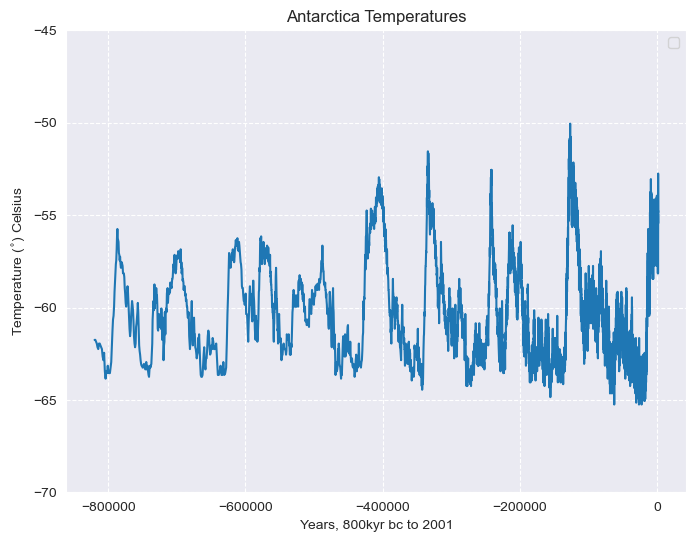

In [102]:
plt.figure(figsize=(8, 6))  

sns.lineplot(aicc, x = "Corrected Years", y = "temp",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

plt.ylim(-70, -45)
plt.ylabel('Temperature ($^{\circ}$) Celsius')
plt.xlabel('Years, 800kyr bc to 2001')
plt.title("Antarctica Temperatures")
plt.legend()

The Modern-Era Retrospective analysis for Research and Applications, Version 2 ( MERRA-2) assimilation, produced by the Goddard Earth Observing System Data Assimilation System (GEOS DAS) [[21]](https://ozonewatch.gsfc.nasa.gov/meteorology/temp_2022_MERRA2_SH.html) provide monthly temperature values in Antarctica from 1973 onwards. 



In [1]:
merra = pd.read_csv('Datasets Used/Antartica_temp_merra2.csv', skiprows=9, encoding='latin-1') 
merra['temp'] = merra['Data'] -273.15 # converting to celHardCRUTsius
merra.rename(columns={'Year': 'Corrected Years', 'Data':'Data'}, inplace=True) # to fit the variable names of aicc.
merra = merra.iloc[:, [0, 4]] # dropping irrelevant columns
merra = merra.iloc[::-1] # reversing the order so its most recent at the top
merra

NameError: name 'pd' is not defined

Originally, in order to establish a continuous temperature record up until 2023, I was going to concat this onto the top of the aicc dataset to give consistent values from 1979-2023. However from looking at the datasets there seems to be a big jump in temperature values. aicc has a mean annual temperature in 1977 of -54, Meera has a mean annual temperature of -43 degrees in 1979. It would seem unlikely that there was a 10 degree increase during these years. 



# Anomaly

A temperature anomaly is a deviation in temperature from a long term average for a particular location. They are used in climate science and meteorology, to help identify trends and variations in temperature over time. To calculate this you need a baseline, which is the average temperature over a period of time which typically spans a few decades difference from an average/baseline temperature [[22]](https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature).

When decding to pick a period of time to calculate a baseline from I wanted to avoid any major impact of the industrial revolution so we could contrast pre- and post industrial age.  I will pick the period 1800-1900.

In [122]:
baseline_start =1800
baseline_end = 1900

bs_df = aicc[(aicc['Corrected Years'] >= baseline_start) & (aicc['Corrected Years'] <= baseline_end)] 
bs_df.head(20)   # a new dataframe with all years between 1800 and 1900

,Corrected Years,temp
15,1892,-55.45
16,1883,-56.15
17,1874,-55.75
18,1864,-55.75
19,1855,-56.25
20,1845,-54.95
21,1835,-56.35
22,1825,-56.85
23,1815,-55.35
24,1805,-56.15


In [124]:
baseline= bs_df['temp'].mean()

aicc['Anomaly'] = aicc['temp'] - baseline
aicc.head()

,Corrected Years,temp,Anomaly
0,2005,-54.85,1.05
1,2000,-54.85,1.05
2,1996,-54.85,1.05
3,1991,-54.85,1.05
4,1984,-54.85,1.05


In [ ]:
baseline_start =1800
baseline_end = 1900

bs_df = complete_temp[(complete_temp['Corrected Years'] >= baseline_start) & (complete_temp['Corrected Years'] <= baseline_end)] 
bs_df.head(20)   # a new dataframe with all years between 1800 and 1900

#https://www.statology.org/and-operator-in-pandas/

,Corrected Years,temp
55,1892,-55.45
56,1883,-56.15
57,1874,-55.75
58,1864,-55.75
59,1855,-56.25
60,1845,-54.95
61,1835,-56.35
62,1825,-56.85
63,1815,-55.35
64,1805,-56.15


In [ ]:
baseline= bs_df['temp'].mean()

aicc['Anomaly'] = aicc['temp'] - baseline
aicc.head()

,Corrected Years,temp,Anomaly
0,2005.000000,-54.85,1.05
1,2000.513333,-54.85,1.05
2,1996.026667,-54.85,1.05
3,1991.540000,-54.85,1.05
4,1984.516667,-54.85,1.05


Text(0.5, 1.0, 'Temperature Anomaly from 800Kyr ago to 2005')

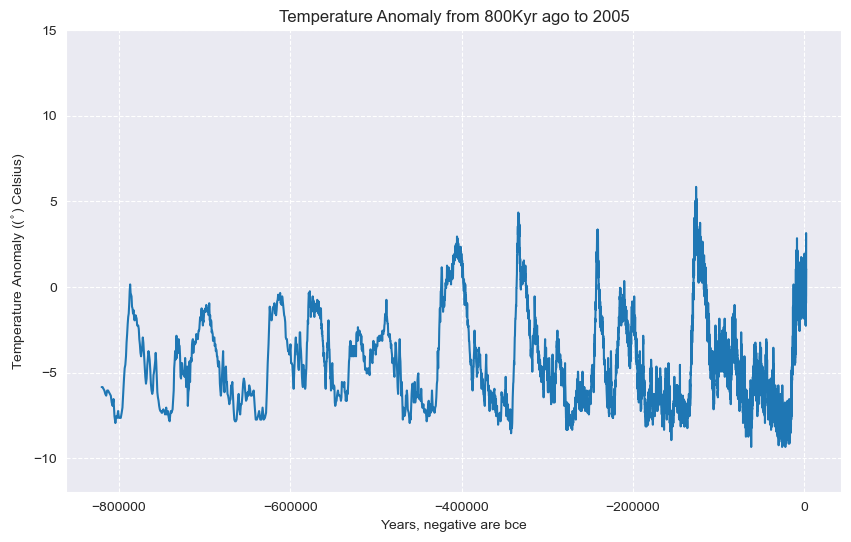

In [127]:
plt.figure(figsize=(10, 6))  

sns.lineplot(aicc, x = "Corrected Years", y = "Anomaly",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.ylim(-12, 15) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Temperature Anomaly ($^{\circ}$ Celsius)')
plt.xlabel('Years, negative are bce')
plt.grid(True)
plt.title("Temperature Anomaly from 800Kyr ago to 2005")



c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


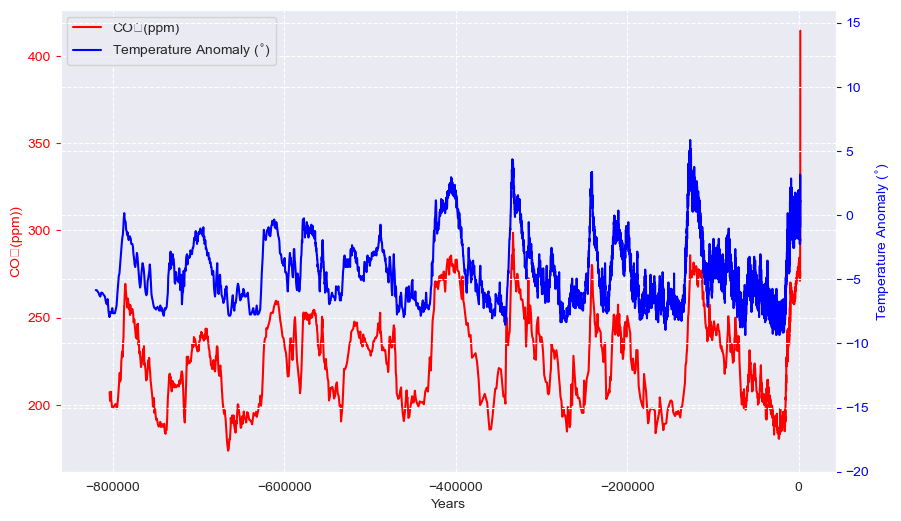

In [128]:
# Plot both CO2 and temp on the same plot with two y axis

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(complete_co2['Corrected Years'], complete_co2['CO2(ppmv)'], "red", label= "CO2(ppm)") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2(ppm))', color='red')
ax1.tick_params('y', colors='red')
#ax1.get_legend_handles_labels()

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(aicc['Corrected Years'], aicc['Anomaly'], color='blue', label='Temperature Anomaly ($^{\circ}$)')
ax2.set_ylabel('Temperature Anomaly ($^{\circ}$) ', color='blue')
ax2.set_ylim(-20, 16)
ax2.tick_params('y', colors='blue')

# Combining legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

From looking at the above plot we can see the peaks and troughs of both Temperature anomaly and Co2 levels roughly match each other indicating a correlation between these two variables. Whether either one is directly impacting the other will be explored later on.

The Hadley Centre of the Met Office UK produces a gridded dataset of global historical surface temperature anomalies [[23]](https://www.metoffice.gov.uk/hadobs/hadcrut5/#:~:text=HadCRUT5%20is%20a%20gridded%20dataset,and%20regional%20average%20time%20series.) called HadCRUT5. It is one of the main datasets used to monitor global and regional surface temperature variability. They divided the whole globe into a grid of boxes and gather temperature data for each one. Their data is fromed by combining sea surface temperature records and land surface air temperature [[24]](https://climatedataguide.ucar.edu/climate-data/global-land-ocean-surface-temperature-data-hadcrut5). 

This data of anomalies covers from 1850-2023 and it provides both monthly and annual data. 

As it provides a global temperature anomaly it is not suitable to add to the previous 'aicc' record we used above, which was just for Antarctica. However it can still be used to show monthly variation/seasonality. 

In [141]:
# Looking at monthly variation

hadcrut = pd.read_csv('Datasets Used/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.csv', usecols=(0, 1))
hadcrut

,Time,Anomaly (deg C)
0,1850-01,-0.674564
1,1850-02,-0.333416
2,1850-03,-0.591323
3,1850-04,-0.588721
4,1850-05,-0.508817
...,...,...
2082,2023-07,1.150027
2083,2023-08,1.199283
2084,2023-09,1.352173
2085,2023-10,1.286608


Text(0.5, 1.0, 'Monthly Temperature Anomaly from 1850 to 2023')

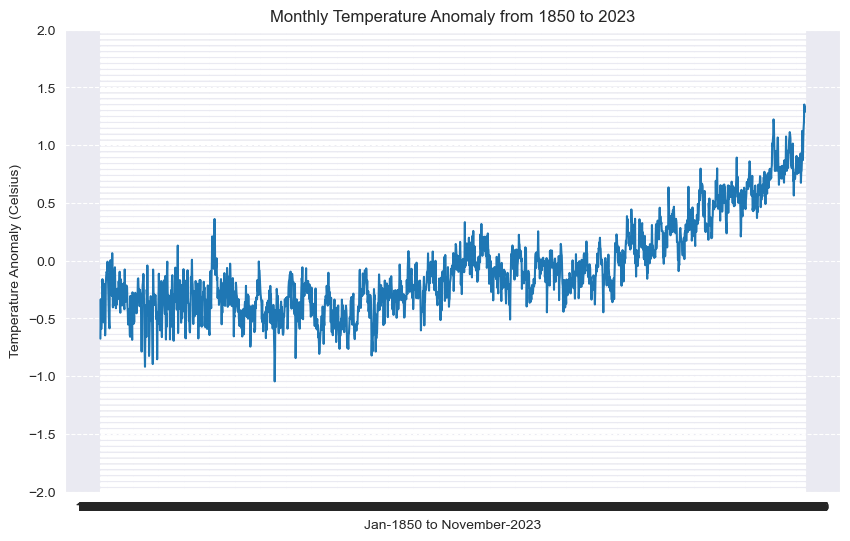

In [192]:
plt.figure(figsize=(10, 6))  

ax = sns.lineplot(hadcrut, x = "Time", y = "Anomaly (deg C)",)
ax = sns.set_style("darkgrid" , {"ytick.major.size": 2 ,  'grid.linestyle': '--'})
plt.ylim(-2, 2) 
plt.ylabel('Temperature Anomaly (Celsius)')
plt.xlabel('Jan-1850 to November-2023')
plt.grid(True)
plt.title("Monthly Temperature Anomaly from 1850 to 2023")

In the above graph we can see variablity between months/seasons and it also shows the general upward trend of temperature over the last 173 years.

# Methane

Carbon dioxide is one of a number of greenhouse gases. Another big contributor is the gas methane (CH4). Methane is the main component in natural gas, which fuels industrial plants, powers homes and runs air conditioners, among other applications. According to the EPA (USA) 50-65% of total CH4 emissions come from the following human activities; Raising livestock, Leaks from natural gas systems, Landfills and waste from homes and businesses [[25]](https://www.epa.gov/ghgemissions/overview-greenhouse-gases)


The epa.gov website has provided a compiled dataset for Methane levels from 800Kyr bp up until 2021 [[26]](https://www.epa.gov/system/files/other-files/2022-07/ghg-concentrations_fig-2.csv). Again the historic data is collected from the ice-core sampling in Antarctica, however also included are weather stations in Australia, Hawaii and Scotland. This is the dataset I will use for my analysis.

In [159]:
#reading in the dataset

methane = pd.read_csv('Datasets Used/ch4-ghg-concentrations_fig-2.csv', skiprows=7, usecols=[0, 1, 2, 3, 4, 5]) 
methane.rename(columns={'Ice core measurements':'Corrected Years', 'Unnamed: 1':'EPICA', 'Unnamed: 2':'Law Dome', 'Unnamed: 3':'Cape Grim, Australia', 'Unnamed: 4':'Mauna Loa, Hawaii','Unnamed: 5': 'Shetland Islands, Scotland'}, inplace=True)

methane = methane.drop(labels =2175, axis=0) #There is a break in the compiled datasets when  it moves from ice core samples to direct measurements. i want to remove ths. 

methane['Corrected Years'] =methane['Corrected Years'].astype(float) #trying to remove decimals but get an error message when converting to int. 
methane['Corrected Years'] =methane['Corrected Years'].astype(int) #however it will allow me to convert to float first and then back to int
methane.tail(140) #checking it looks as expected


,Corrected Years,EPICA,Law Dome,"Cape Grim, Australia","Mauna Loa, Hawaii","Shetland Islands, Scotland"
2073,732,642.659181,NaN,NaN,NaN,NaN
2074,818,643.700000,NaN,NaN,NaN,NaN
2075,858,633.223011,NaN,NaN,NaN,NaN
2076,912,634.700000,NaN,NaN,NaN,NaN
2077,1003,636.214393,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2209,2017,NaN,NaN,1798.62,1865.50,NaN
2210,2018,NaN,NaN,1810.81,1871.53,NaN
2211,2019,NaN,NaN,1816.61,1882.55,NaN
2212,2020,NaN,NaN,1824.70,1891.47,NaN


The EPICA dataset has methane values from year 797,446 bc up to 1936 ce. The Law-Dome dataset covers from 1008 ce to 1980ce and it has more datapoints for the overlapping years than EPICA. Mauna Loa has consistent datapoints since 1984. Therefore I will stitch togehter my own timeline as follows;

- 800,000bc - 1003ce - EPICA
- 1008ce    - 1980ce - Law Dome
- 1984      - 2022ce -  Mauna Loa

In [160]:
methane = methane.iloc[:, [0, 1, 2, 4]] # removing other columns



In [161]:
#Creating another column with that will have a combined timeline

methane['CH4'] = methane[['EPICA', 'Law Dome', 'Mauna Loa, Hawaii']].mean(axis=1)
methane.tail(100)

,Corrected Years,EPICA,Law Dome,"Mauna Loa, Hawaii",CH4
2113,1681,NaN,692.0,NaN,692.000000
2114,1691,679.307838,NaN,NaN,679.307838
2115,1694,NaN,676.1,NaN,676.100000
2116,1722,NaN,671.9,NaN,671.900000
2117,1742,682.700000,NaN,NaN,682.700000
...,...,...,...,...,...
2209,2017,NaN,NaN,1865.50,1865.500000
2210,2018,NaN,NaN,1871.53,1871.530000
2211,2019,NaN,NaN,1882.55,1882.550000
2212,2020,NaN,NaN,1891.47,1891.470000


Text(0.5, 1.0, 'Atmospheric Methane Levels over the last 800 thousand years')

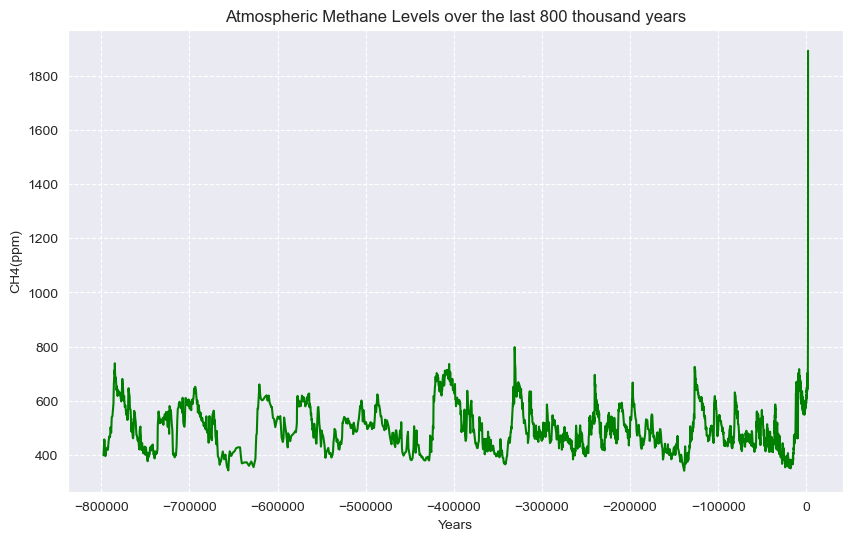

In [162]:
#Plotting Methane levels in one continuous plot

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the average data
ax1.plot(methane['Corrected Years'], methane['CH4'], 'green', label= "Average") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4(ppm)')
plt.title("Atmospheric Methane Levels over the last 800 thousand years")


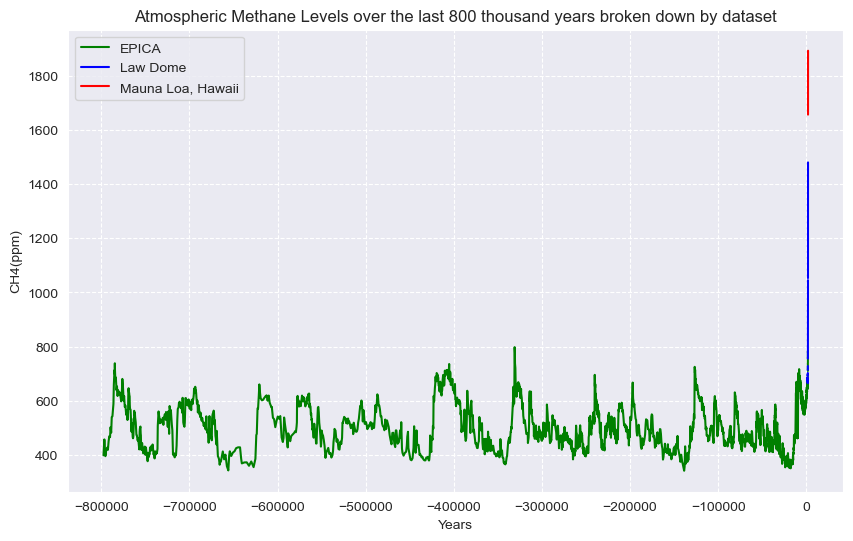

In [ ]:
# Breakind down the Methan plot by dataset

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plotting the EPICA dataset
ax1.plot(methane['Corrected Years'], methane['EPICA'], 'green', label= "EPICA") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4(ppm)')
#ax1.get_legend_handles_labels()

# Plotting the Law Dome dataset
ax1.plot(methane['Corrected Years'], methane['Law Dome'], 'blue', label='Law Dome') 

# Plotting the Mauna Loa dataset 
ax1.plot(methane['Corrected Years'], methane['Mauna Loa, Hawaii'], 'red', label='Mauna Loa, Hawaii') 

plt.title("Atmospheric Methane Levels over the last 800 thousand years broken down by dataset")
plt.legend(loc='upper left')

Looking at the above graph we can see a break in datapoints between approx 1400ppm and 1650ppm. This is when values diverged from Ice core samples to direct measurements from Hawaii. 

Text(0.5, 1.0, 'Atmospheric CO2 and CH4 levels')

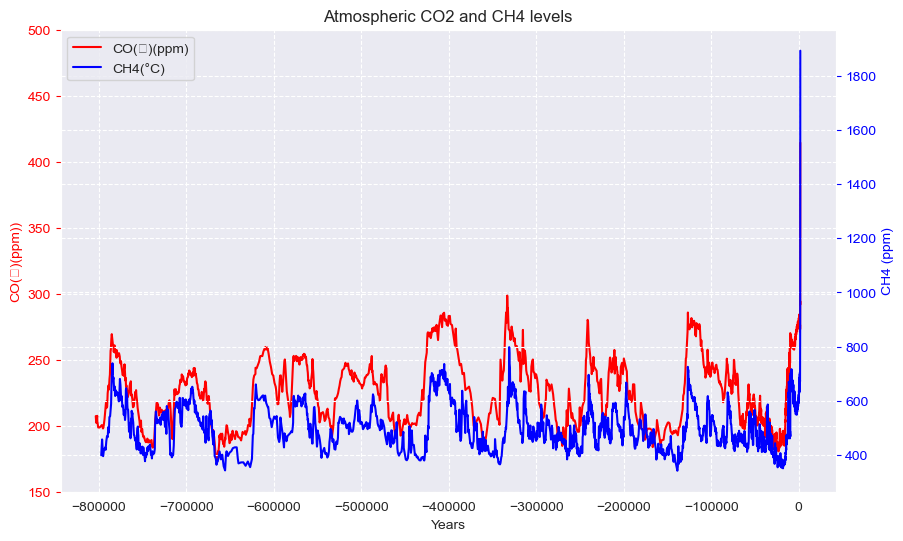

In [173]:
# Plot CO2 and CH4 on same graph

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the CO2 dataset on the primary y-axis (left)
ax1.plot(complete_co2['Corrected Years'], complete_co2['CO2(ppmv)'], "red", label= 'CO(2)(ppm)') 
ax1.set_xlabel('Years')
ax1.set_ylabel('CO(2)(ppm))', color='red')
ax1.set_ylim(150, 500) # had to play around with y values so it looked nicer compated to CO2
ax1.tick_params('y', colors='red')


# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(methane['Corrected Years'], methane['CH4'], 'blue', label='CH4(\u00b0C)') 
ax2.set_ylabel('CH4 (ppm)', color='b')
ax2.tick_params('y', colors='b')
#ax2.get_legend_handles_labels()

# had trouble getting legend to appear until finding this solution https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title("Atmospheric CO2 and CH4 levels")

Text(0.5, 1.0, 'Atmospheric CH4 levels and Temperature Anomaly over 800,000 years')

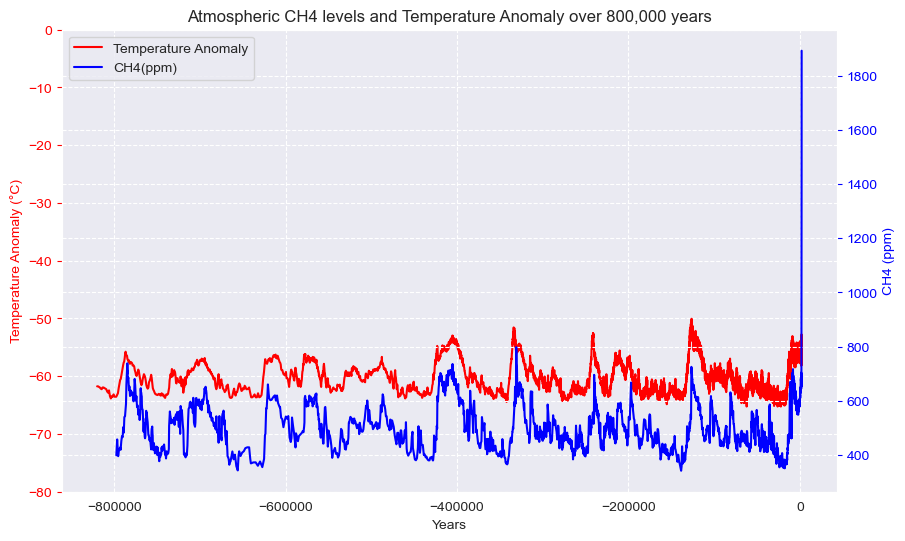

In [172]:
# Plot CH4 and Temperature on same graph

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the CO2 dataset on the primary y-axis (left)
ax1.plot(aicc['Corrected Years'], aicc['temp'], "red", label= 'Temperature Anomaly') 
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature Anomaly (\u00b0C)', color='red')
ax1.set_ylim(-80, 0)
ax1.tick_params('y', colors='red')


# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(methane['Corrected Years'], methane['CH4'], 'blue', label='CH4(ppm)') 
ax2.set_ylabel('CH4 (ppm)', color='b')
ax2.tick_params('y', colors='b')
#ax2.get_legend_handles_labels()

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title("Atmospheric CH4 levels and Temperature Anomaly over 800,000 years")

In [177]:
#we have some Nan values in the Average Column stemming from our merge. These will be removed

methane['CH4'].dropna(inplace=True)
methane.tail(35)

,Corrected Years,EPICA,Law Dome,"Mauna Loa, Hawaii",CH4
2179,1987,NaN,NaN,1693.10,1693.10
2180,1988,NaN,NaN,1703.95,1703.95
2181,1989,NaN,NaN,1717.99,1717.99
2182,1990,NaN,NaN,1731.45,1731.45
2183,1991,NaN,NaN,1740.96,1740.96
2184,1992,NaN,NaN,1745.48,1745.48
2185,1993,NaN,NaN,1748.66,1748.66
2186,1994,NaN,NaN,1758.35,1758.35
2187,1995,NaN,NaN,1761.94,1761.94
2188,1996,NaN,NaN,1763.12,1763.12


# Irish Temperature

As part of the Ireland Long-term Maximum and Minimum Air Temperature (ILMMT) dataset [[27]](https://www.met.ie/climate/available-data/long-term-data-sets) there are a series of datasets recording Min (°C) and Max (°C) temperatures at a number of different stations throughout Ireland going from the 1830s up to the late 1950s. 

<div style="text-align:center;">
  <img src="Weather Stations.jpg" width = '200'>
</div>

I could not find any source that had previously compiled the data from the different weather stations into one document. In order to get a representative picture of the full island I have selected 3 stations Phoenix Park (East), Malin Head (North), and Markree (West). While there are more stations recording the same these are the most consistent and complete. In addition, in other stations they seem to measure temperature at specific times of the day as opposed to the Max/mins. 

For more modern data met.ie has compiled datasets bringing this up to modern day. I will first look at them individually and then look to stitch these together to create a continuous record of Irish temperatures from 1830s-2022. 


In [178]:
phoenix = pd.read_csv('Datasets Used/Phoenix Park Dublin_1831-1958.csv', usecols=[0, 1, 2, 5, 6], encoding= 'latin-1') # dont need faranheit columns, the degress symbol was cauising na error wiht utf-8 so I changed the encoding to latin-1
phoenix = phoenix.groupby(['Year', 'Month'])[['Max (°C)', 'Min (°C)']].mean().reset_index() # getting an average for each month

phoenix['Mean'] = phoenix[['Max (°C)', 'Min (°C)']].mean(axis=1) # adding another column with the mean monthly value
#phoenix.head(280) #checking it looks as expected
annual_phoenix = phoenix.groupby('Year')['Mean'].mean().reset_index()
annual_phoenix.head(25)

,Year,Mean
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
3,1834,14.312648
4,1835,11.424772
5,1836,10.193009
6,1837,10.075601
7,1838,9.193793
8,1839,8.400847
9,1840,8.478218


Text(0.5, 0, 'Years')

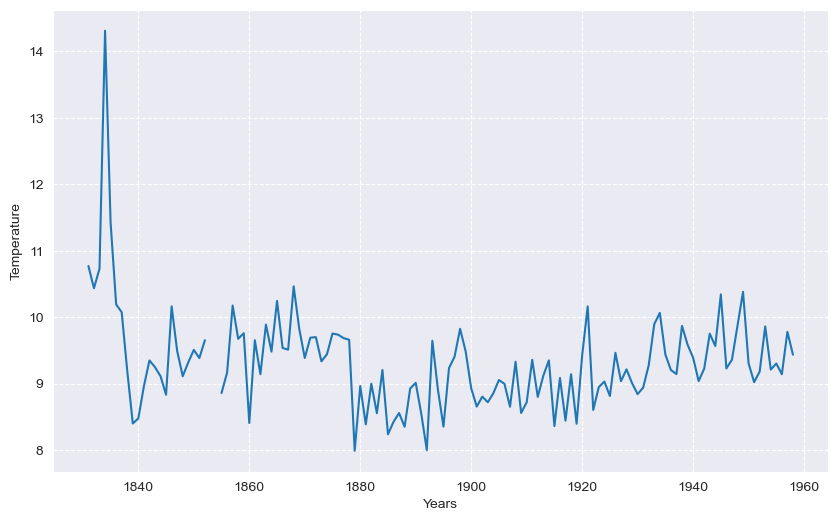

In [179]:
#Annual Mean Temperature from 1831-1958 in Phoenix Park Meterological Station

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(annual_phoenix['Year'], annual_phoenix['Mean'])
ax1.set_ylabel("Temperature")
ax1.set_xlabel("Years")

From a quick look at the above graph we can see there is something wrong with the data in the mid 1830s. The average peaks at 14 degrees in one year which is way out line in comparison to every other year. 

Upon reviewing the dataset again, it appears in 1834 and 1835 only the maximum temperatures were recorded. There are no values for 'Min'. In order to compensate for this we will ignore these years in the dataset going forward. 

There is also a gap for years 1853 + 1854. The Metadata that was available with this dataset says the following;

"No traceable handwritten registers of continuous daily maximum and minimum air temperature observations.
No monthly or annual averages of maximum and minimum air temperature in the period 1853-1854 are available in James (1862)."

These 4 years will be removed from the dataset. 


In [180]:

annual_phoenix= annual_phoenix.drop([3, 4, 22, 23]) # 1834 was at index 3, 1853 and 1854 were index 22 and 23 respectively. They have now been removed
annual_phoenix.head(30)

,Year,Mean
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
5,1836,10.193009
6,1837,10.075601
7,1838,9.193793
8,1839,8.400847
9,1840,8.478218
10,1841,8.960772
11,1842,9.350333


In [181]:
malin = pd.read_csv('Datasets Used/Malin Head_1885-1958.csv', usecols=[0, 1, 2, 5, 6], encoding= 'latin-1') # dont need faranheit columns, the degress symbol was cauising na error wiht utf-8 so I changed the encoding to latin-1
malin = malin.groupby(['Year', 'Month'])[['Max (°C)', 'Min (°C)']].mean().reset_index() # getting an average for each month


malin['Mean'] = malin[['Max (°C)', 'Min (°C)']].mean(axis=1) # adding another column with the mean monthly value
malin.head(280) #checking it looks as expected
annual_malin = malin.groupby('Year')['Mean'].mean().reset_index()
annual_malin.tail(25)

,Year,Mean
46,1931,9.324660
47,1932,9.606390
48,1933,9.783999
49,1934,9.499958
50,1935,9.189576
51,1936,9.336750
52,1937,9.320171
53,1938,9.517813
54,1939,9.182385
55,1940,8.953216


In [182]:
markree = pd.read_csv('Datasets Used/Markree_1850-1968.csv', usecols=[0, 1, 2, 5, 6], encoding= 'latin-1') # dont need fahrenheit columns, the degrees symbol was causing an error with utf-8 so I changed the encoding to latin-1
markree = markree.groupby(['Year', 'Month'])[['Max (°C)', 'Min (°C)']].mean().reset_index() # getting an average for each month

markree['Mean'] = markree[['Max (°C)', 'Min (°C)']].mean(axis=1) # adding another column with the mean monthly value
#markree.head(280) #checking it looks as expected
annual_markree = markree.groupby('Year')['Mean'].mean().reset_index()

# For the year 1856, the only temps recorded were in Jan+Feb, throwing the average annual temp off. as such i will remove the years values
# Same for 1852
# Same for 194 only months recorded are Nov+Dec 

annual_markree.at[6, 'Mean'] = np.nan # 1856
annual_markree.at[24, 'Mean'] = np.nan # 1974
annual_markree.at[2, 'Mean'] = np.nan # 1852
annual_markree.head(25)

,Year,Mean
0,1850,7.613199
1,1851,9.797130
2,1852,NaN
3,1853,NaN
4,1854,NaN
5,1855,9.251573
6,1856,NaN
7,1857,NaN
8,1858,NaN
9,1859,NaN


In [183]:
# Created a new dataset by merging the above 3 datasets. 

#The merge was only including rows that had a value in all dataframes. how='outer' should include all rows even if the other dataframes are missing a value. 
all_ireland_until_1950s =  pd.merge(annual_phoenix, annual_malin, on='Year', how='outer')
all_ireland_until_1950s =pd.merge(all_ireland_until_1950s, annual_markree, on='Year', how='outer')
all_ireland_until_1950s.head(50)

,Year,Mean_x,Mean_y,Mean
0,1831,10.771441,NaN,NaN
1,1832,10.437295,NaN,NaN
2,1833,10.730021,NaN,NaN
3,1836,10.193009,NaN,NaN
4,1837,10.075601,NaN,NaN
5,1838,9.193793,NaN,NaN
6,1839,8.400847,NaN,NaN
7,1840,8.478218,NaN,NaN
8,1841,8.960772,NaN,NaN
9,1842,9.350333,NaN,NaN


In [184]:
#Now we can get an approximate national figure for annual mean temperature
all_ireland_until_1950s["Annual Average Temperature"] = all_ireland_until_1950s[['Mean_x',	'Mean_y',	'Mean']].mean(axis=1)
#all_ireland_until_1950s.tail(50)

all_ireland_until_1950s= all_ireland_until_1950s.drop([124, 125]) # No dataset has values for year 1853 or 1854.
all_ireland_until_1950s= all_ireland_until_1950s.iloc[:, [0, 4]]
all_ireland_until_1950s.tail(50)

,Year,Annual Average Temperature
84,1919,8.459856
85,1920,9.244283
86,1921,10.031206
87,1922,8.589137
88,1923,8.838376
89,1924,9.001726
90,1925,8.724911
91,1926,9.438442
92,1927,8.980044
93,1928,9.108216


Text(0.5, 1.0, 'Approximate mean annual temperature for all of ireland 1831-1968')

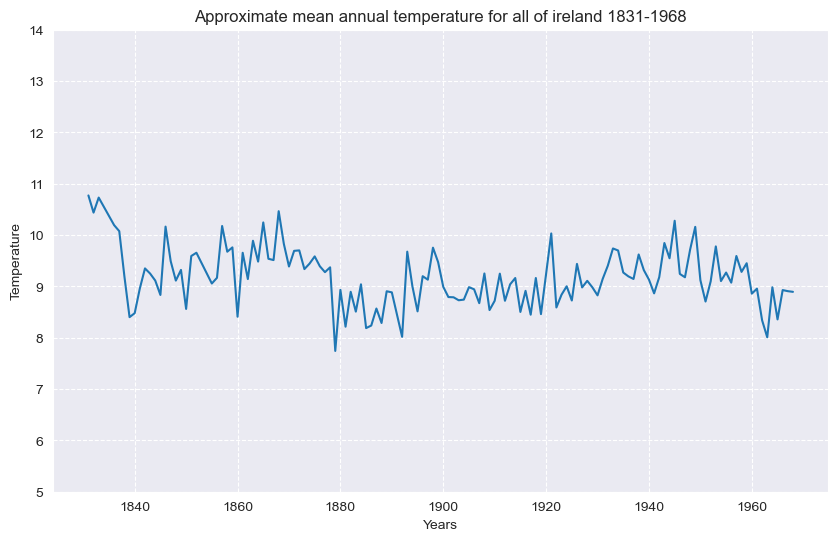

In [185]:
#Approx annual Mean Temperature from 1831-1958 for all of ireland

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(all_ireland_until_1950s['Year'], all_ireland_until_1950s['Annual Average Temperature'])
ax1.set_ylabel("Temperature")
ax1.set_xlabel("Years")
ax1.set_ylim(5, 14)

plt.title("Approximate mean annual temperature for all of ireland 1831-1968")

**1958 - Present**

On the CSO website[[28]](https://data.cso.ie/) they have available all temperature records from 15 different weather stations around Ireland going back to 1958. I will upload this dataset below. The date information has year and month written in one cell, in the format "yyyyMmm" eg.1958M01. I will split this into 2 cells: year and month. 


In [186]:
ire_temp = pd.read_csv('Datasets Used/Ireland_temp_1958-2022.csv', usecols=[1, 2, 4])

# create a time series instead of yyyyMmm

ire_temp['Month'] = ire_temp['Month'].str.replace('M', '-')
ire_temp['Date'] = pd.to_datetime(ire_temp['Month'], format='%Y-%m') # create a time series
#ire_temp['Year'] = (ire_temp['Month'].str.slice(0,4)).astype(int)
#ire_temp['Months'] = (ire_temp['Month'].str.slice(5, 7)).astype(int)
ire_temp= ire_temp.drop(columns= 'Month')
ire_temp.head()

,Meteorological Weather Station,VALUE,Date
0,Belmullet,5.9,1958-01-01
1,Birr,5.0,1958-01-01
2,Valentia Observatory,7.1,1958-01-01
3,Casement,NaN,1958-01-01
4,Claremorris,4.4,1958-01-01


In [187]:
ire_temp.rename(columns={'VALUE': 'Mean'}, inplace=True)
ire_temp = ire_temp.groupby('Date')['Mean'].mean().reset_index() # Get an all ireland monthly mean temperature by averaging the values from each station. 
#ire_temp['Year'].astype(int)
#ire_temp['Date'] = pd.to_datetime(ire_temp[['Year', 'Months']].assign(DAY=1))
ire_temp.tail(20)

,Date,Mean
760,2021-05-01,9.73
761,2021-06-01,13.69
762,2021-07-01,16.74
763,2021-08-01,15.51
764,2021-09-01,15.10
765,2021-10-01,11.96
766,2021-11-01,8.82
767,2021-12-01,7.59
768,2022-01-01,6.76
769,2022-02-01,7.37


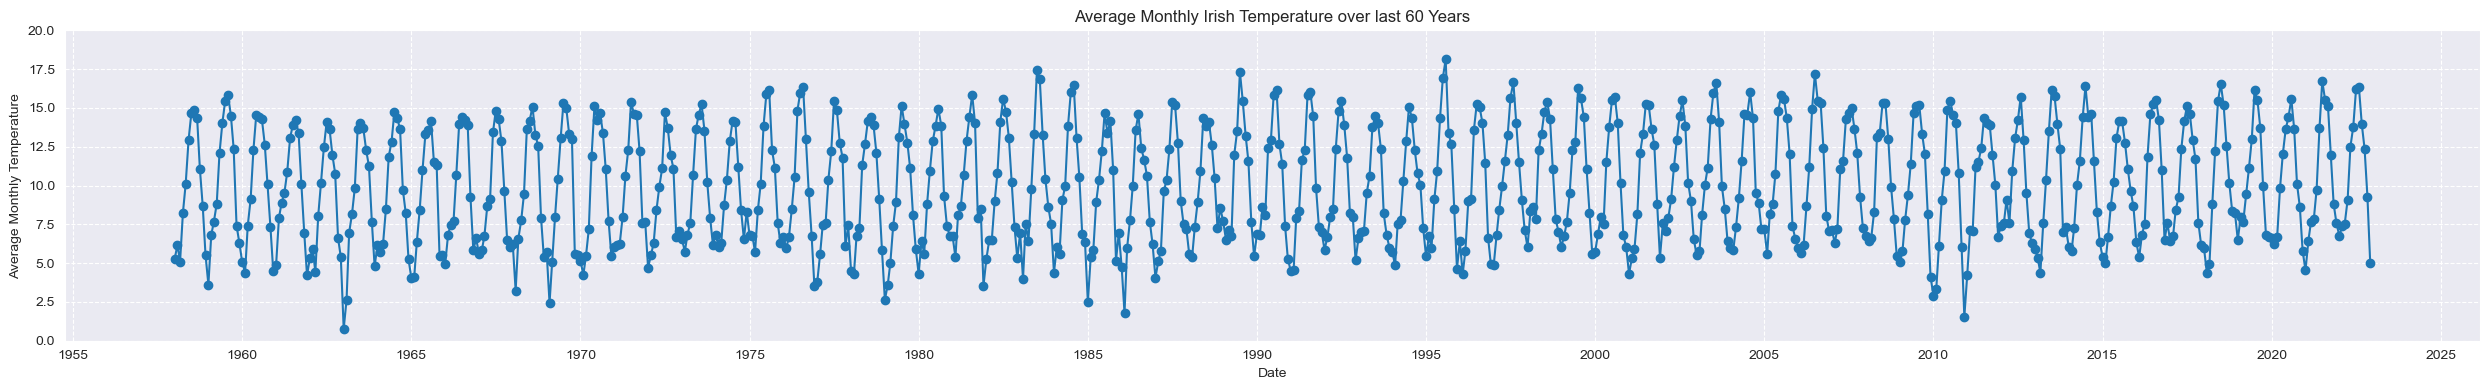

In [188]:
# Scatter plot
plt.figure(figsize=(25, 4)) #spreading out x-values as much as possible
plt.plot(ire_temp['Date'], ire_temp['Mean'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature')
plt.title('Average Monthly Irish Temperature over last 60 Years')
plt.ylim(0, 20)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))
plt.tight_layout()
plt.show()

The above plot shows the average temperatures for all months since 1958. There are 12 datapoints for each year which leads to it being incredibly noisey and very difficult to draw any conclusions from. In order to get around this but still show the annual fluctuations, I will break them into the seasons. In order to do this I need to create a function which will iterate through our time series and designate a value of Spring, Summer, Autumn or Winter into a new column.

In [193]:
#Function that will assign a season based on the month value

def season(month):
  if month in [3, 4, 5]:
    return "Spring"
  if month in [6, 7, 8]:
    return "Summer"
  if month in [9, 10, 11]:
    return "Autumn"
  else: 
    return "Winter"

In [194]:
# need to seperate the month value from the time series
ire_temp['Month'] = ire_temp['Date'].dt.month
ire_temp['Year'] = ire_temp['Date'].dt.year

ire_temp['Season'] = ire_temp['Month'].apply(season)
ire_temp

,Date,Mean,Month,Year,Season
0,1958-01-01,5.258333,1,1958,Winter
1,1958-02-01,6.166667,2,1958,Winter
2,1958-03-01,5.083333,3,1958,Spring
3,1958-04-01,8.250000,4,1958,Spring
4,1958-05-01,10.125000,5,1958,Spring
...,...,...,...,...,...
775,2022-08-01,16.340000,8,2022,Summer
776,2022-09-01,13.950000,9,2022,Autumn
777,2022-10-01,12.380000,10,2022,Autumn
778,2022-11-01,9.270000,11,2022,Autumn


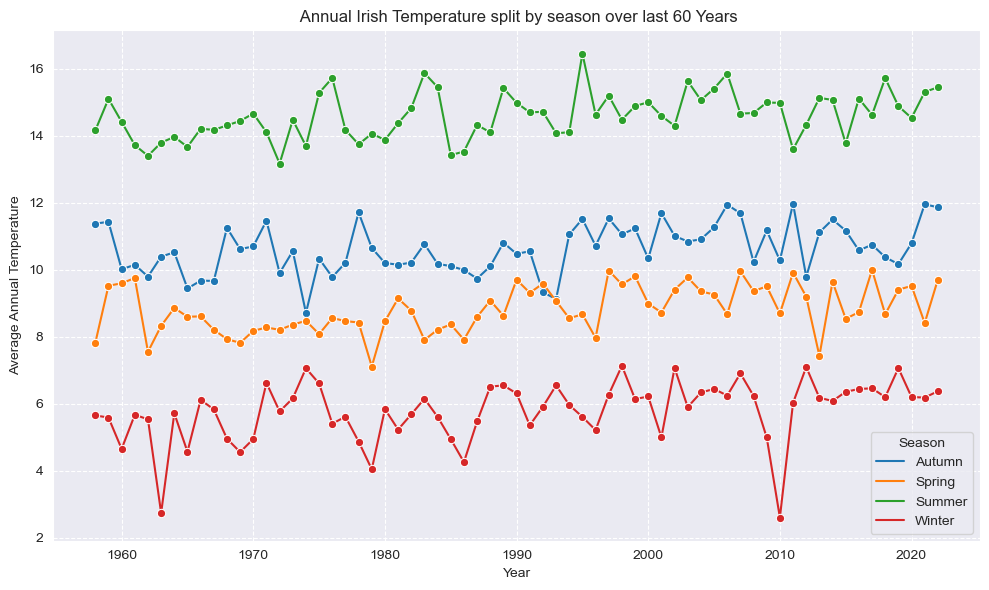

In [196]:
ire_temp = ire_temp.groupby(['Year', 'Season'])['Mean'].mean().reset_index()
ire_temp

plt.figure(figsize=(10, 6))

sns.lineplot(data=ire_temp, x='Year', y='Mean', hue = 'Season', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Annual Temperature')
plt.title(' Annual Irish Temperature split by season over last 60 Years')

plt.tight_layout()
plt.show()

From reviewing the above graph there are a few immediate points of interest.  It shows the winters of 1962/1963 [[29]](http://www.irishidentity.com/extras/weather/stories/196263.htm#:~:text=The%20winter%20of%201962%2F1963,and%20barely%20relented%20until%20March.) and 2010/2011 [[30]](https://www.met.ie/cms/assets/uploads/2017/08/ColdSpell10.pdf) were particularly cold, which is backed up in new articles from the time. It also highlights a heatwave that hit in Summer of 1995 [[31]](https://en.wikipedia.org/wiki/1995_British_Isles_heatwave).

By finding an average value for the full year we can plot the average annual temperature in Ireland over this time period. 

In [197]:
ire_temp = ire_temp.groupby('Year')['Mean'].mean().reset_index()
ire_temp.rename(columns = {'Year': 'Year', 'Mean': 'Annual Average Temperature'}, inplace=True)
ire_temp.head()

,Year,Annual Average Temperature
0,1958,9.753472
1,1959,10.413194
2,1960,9.670833
3,1961,9.825000
4,1962,9.071795


Text(0.5, 1.0, 'Mean Annual Temperature of Ireland Since 1958')

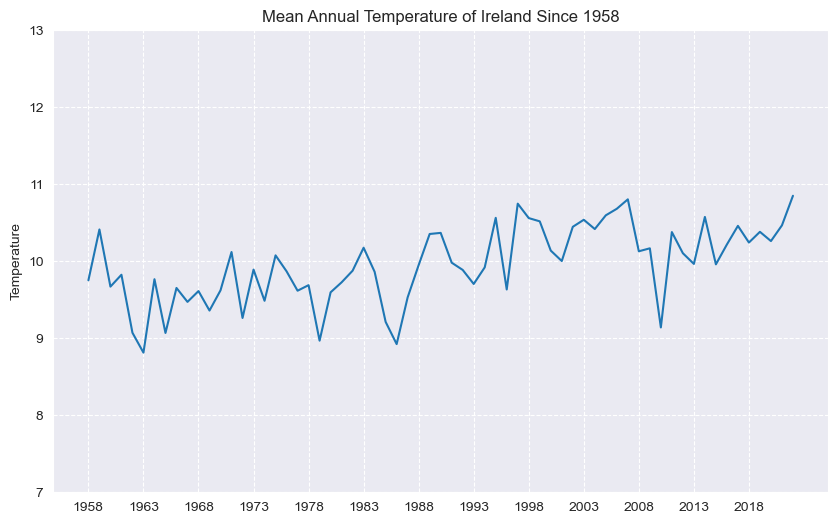

In [198]:
#Plot of Irish temperatures since 1958

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(ire_temp['Year'], ire_temp['Annual Average Temperature'])
ax1.set_xticks(ire_temp['Year'][::5])
ax1.set_ylabel("Temperature")
ax1.set_ylim(7, 13)
plt.title("Mean Annual Temperature of Ireland Since 1958")

In [199]:
# Joining the 1830-1960s dataset to the met.ie present day dataset.
# There is an overlap of years (1958-1968). The met.ie datapoints seem more consistent and reliable so I will cut off the 1830-1860s dataset at 1957.
all_ireland_until_1950s = all_ireland_until_1950s.head(123) # complete until 1957

complete_ire_temp = pd.concat([all_ireland_until_1950s, ire_temp], ignore_index = True)

complete_ire_temp.head()

,Year,Annual Average Temperature
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
3,1836,10.193009
4,1837,10.075601


Text(0.5, 1.0, 'Mean Annual Temperature of Ireland')

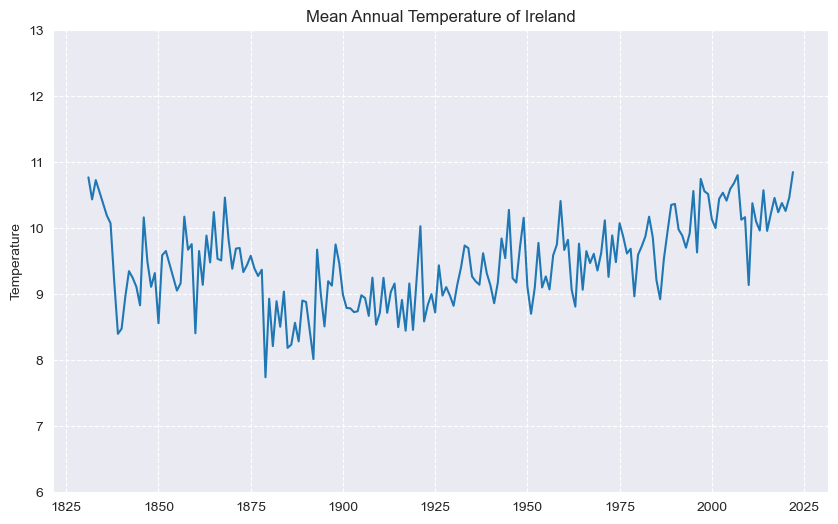

In [200]:
#Plot of Mean Annual Temperature in Ireland since 1831

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(complete_ire_temp['Year'], complete_ire_temp['Annual Average Temperature'])
ax1.set_ylabel("Temperature")
ax1.set_ylim(6, 13)
plt.title("Mean Annual Temperature of Ireland")

In [201]:
#Irish Anomaly using 100 years

ire_baseline_start =1831
ire_baseline_end = 1931

ire_bs = complete_ire_temp[(complete_ire_temp['Year'] >= ire_baseline_start) & (complete_ire_temp['Year'] <= ire_baseline_end)] 
ire_bs   # a new dataframe with all years between 1831 and 1931

,Year,Annual Average Temperature
0,1831,10.771441
1,1832,10.437295
2,1833,10.730021
3,1836,10.193009
4,1837,10.075601
...,...,...
92,1927,8.980044
93,1928,9.108216
94,1929,8.981030
95,1930,8.825171


In [202]:
ire_baseline= ire_bs['Annual Average Temperature'].mean()

complete_ire_temp['Anomaly'] = complete_ire_temp['Annual Average Temperature'] - ire_baseline
complete_ire_temp.head()

,Year,Annual Average Temperature,Anomaly
0,1831,10.771441,1.614604
1,1832,10.437295,1.280458
2,1833,10.730021,1.573184
3,1836,10.193009,1.036172
4,1837,10.075601,0.918764


Text(0.5, 1.0, 'Annual Temperature Anomaly of Ireland')

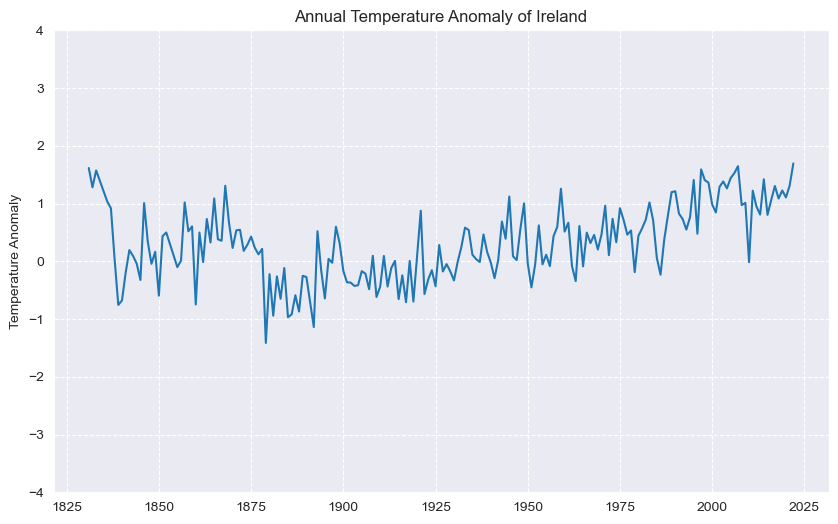

In [203]:
#Plot of Mean Annual Anomaly in Ireland since 1831

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(complete_ire_temp['Year'], complete_ire_temp['Anomaly'])
ax1.set_ylabel("Temperature Anomaly")
ax1.set_ylim(-4, 4)
plt.title("Annual Temperature Anomaly of Ireland")

Looking at the above graph we can see the temperature has been gradually increasing in Ireland since the 1880s. Before this it appears there were higher temperatures and a period of cooling. However this may just highlight the issue of only using 3 weather stations to form a national average.  They do not all have complete records for every year. For example the Markree data had a number of years where there were only 2/3 months were measurements were taken. These happen to have been done in the winter which makes the annual average temperature seem very low. However it is because the other 3 seasons are missing. I have tried to correct for this and remove any years where this is obvious, but it is not a guarantee. 

The reverse may have happened for the years in the 1830s that look particularly high. They may just be missing the data from the colder months. 

Next I want to compare the Irish Anomaly to the global one. HardCRUT also produce an annual global anomaly dataset. I will import this to compare.

In [204]:
annual_hadcrut = pd.read_csv('Datasets Used/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv', usecols=(0, 1))
annual_hadcrut

,Time,Anomaly (deg C)
0,1850,-0.417711
1,1851,-0.233350
2,1852,-0.229399
3,1853,-0.270354
4,1854,-0.291521
...,...,...
169,2019,0.891073
170,2020,0.922921
171,2021,0.761906
172,2022,0.801305


Text(0.5, 1.0, 'Annual Temperature Anomaly from 1850 to 2023')

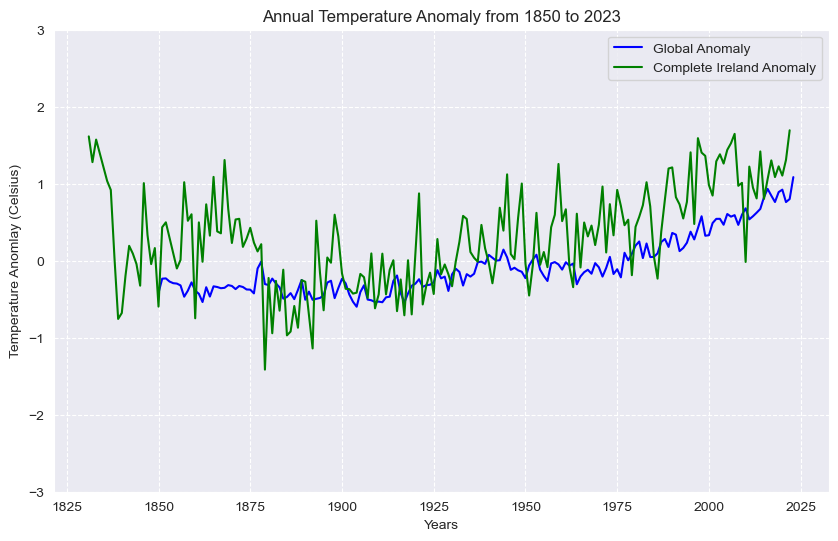

In [205]:
plt.figure(figsize=(10, 6))  

plt.plot(annual_hadcrut['Time'], annual_hadcrut['Anomaly (deg C)'], label='Global Anomaly', color='blue')

plt.plot(complete_ire_temp['Year'], complete_ire_temp['Anomaly'], label='Complete Ireland Anomaly', color='green')

plt.ylim(-3, 3)
plt.ylabel('Temperature Anomlay (Celsius)')
plt.xlabel('Years')
plt.grid(True)
plt.legend()
plt.title("Annual Temperature Anomaly from 1850 to 2023")

Looking at the above plot it is clear that the Irish anomaly is less consistent to the global one.  There could be a number of factors behind this. 

- Fusion of datasets: The Irish data is made up of a number of different records from a number of different weather stations. 
- Inconsistent record keeping; as explained previously. Some of the historical Irish data might only have one or two entries in a given a year. If these are recorded in January, the year will appear much colder than reality. The same situation in the summer could have the opposite effect.
- User Error: I pieced the Irish dataset together myself. The temperature seems to fluctuate more than the global dataset. This could be down to a mistake by me. 
- Different Baselines: For the Irish Anomaly I wanted to pick a time (1800-1900) before heavy industry to try and highlight its affect. If I had picked a later period (eg. 1961-1990), while the trend would remain the same, when plotted on the graph above the anomaly would be lower and more in keeping with the global anomaly.

# Datasets

In analysing these variable we have created a number of datasets.  

**Global**
CO2: complete_co2
Methane: methane
Temperature Anomaly: complete_temp

**Ireland**
Temperature Anomaly: complete_ire_temp

I am going add them all to one dataset. First I need to make sure they have compatible variable names. 

In [207]:
#CO2
complete_co2 = complete_co2.rename(columns={'Corrected Years':'Year'})
complete_co2 = complete_co2[::-1]
complete_co2['CO2(ppmv)'] = complete_co2['CO2(ppmv)'].astype(float)
complete_co2


,Year,CO2(ppmv)
1874,2022,414.420000
1873,2021,412.072500
1872,2020,409.990833
1871,2019,407.631667
1870,2018,405.218333
...,...,...
4,-801975,202.920000
3,-802059,207.500000
2,-802572,204.860000
1,-803182,202.230000


In [208]:

#CH4

ch4 = methane.iloc[:, [0, 4]]
ch4.rename(columns={'Corrected Years':'Year', 'CH4':'CH4'}, inplace=True)
ch4 = ch4[::-1]
ch4.astype(float)
ch4



C:\Users\kolea\AppData\Local\Temp\ipykernel_6272\2874386689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch4.rename(columns={'Corrected Years':'Year', 'CH4':'CH4'}, inplace=True)


,Year,CH4
2213,2021,NaN
2212,2020,1891.47
2211,2019,1882.55
2210,2018,1871.53
2209,2017,1865.50
...,...,...
4,-792988,428.30
3,-794369,418.00
2,-795327,396.10
1,-796467,457.80


In [ ]:
complete_co2

,Year,CO2(ppmv)
1874,2022,414.420000
1873,2021,412.072500
1872,2020,409.990833
1871,2019,407.631667
1870,2018,405.218333
...,...,...
4,-801975,202.920000
3,-802059,207.500000
2,-802572,204.860000
1,-803182,202.230000


In [ ]:
#temp

#complete_temp = complete_temp.iloc[:, [0, 2]]
#complete_temp.rename(columns={'Corrected Years':'Year'}, inplace=True)
#complete_temp['t'].astype(float)
#complete_temp['Year'].astype(int)
#complete_temp.head(10)

,Year,temp
0,2023,-46.68
1,2022,-47.34
2,2021,-46.94
3,2020,-44.03
4,2019,-45.76
5,2018,-44.63
6,2017,-44.38
7,2016,-47.26
8,2015,-45.47
9,2014,-45.34


In [209]:
aicc.rename(columns={'Corrected Years':'Year'}, inplace=True)
aicc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     5819 non-null   int32  
 1   temp     5819 non-null   float64
 2   Anomaly  5819 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 113.8 KB


In [210]:
complete_ire_temp =complete_ire_temp.iloc[:, [0, 2]]
complete_ire_temp = complete_ire_temp[::-1]
complete_ire_temp.rename(columns={'Anomaly':'Irish Anomaly'}, inplace=True)
complete_ire_temp['Irish Anomaly'].astype(float)
complete_ire_temp

,Year,Irish Anomaly
187,2022,1.693996
186,2021,1.309830
185,2020,1.105663
184,2019,1.225663
183,2018,1.086496
...,...,...
4,1837,0.918764
3,1836,1.036172
2,1833,1.573184
1,1832,1.280458


In [212]:
annual_hadcrut = annual_hadcrut.iloc[::-1]
annual_hadcrut = annual_hadcrut.rename(columns={'Time':'Year', 'Anomaly (deg C)':'Global Anomaly'})

annual_hadcrut.head()

,Year,Global Anomaly
173,2023,1.085856
172,2022,0.801305
171,2021,0.761906
170,2020,0.922921
169,2019,0.891073


In [213]:
aicc['Year']= aicc['Year'].astype(int)
aicc

,Year,temp,Anomaly
0,2005,-54.85,1.05
1,2000,-54.85,1.05
2,1996,-54.85,1.05
3,1991,-54.85,1.05
4,1984,-54.85,1.05
...,...,...,...
5814,-815612,-62.15,-6.25
5815,-816681,-61.95,-6.05
5816,-817750,-61.85,-5.95
5817,-818819,-61.75,-5.85


In [215]:
climate_df = pd.merge(complete_co2, ch4, on='Year', how='outer')
climate_df = pd.merge(climate_df, aicc, on='Year', how='outer')
#climate_df = pd.merge(climate_df, complete_temp, on='Year', how='outer')
climate_df = pd.merge(climate_df, complete_ire_temp, on= 'Year', how='outer')
climate_df = pd.merge(climate_df, annual_hadcrut, on= 'Year', how='outer')
climate_df = climate_df.sort_values('Year', ascending=False) # sort the dataframe from most recent
climate_df = climate_df.reset_index(drop=True)
climate_df.head(5000)

,Year,CO2(ppmv),CH4,temp,Anomaly,Irish Anomaly,Global Anomaly
0,2023,NaN,NaN,NaN,NaN,NaN,1.085856
1,2022,414.420000,NaN,NaN,NaN,1.693996,0.801305
2,2021,412.072500,NaN,NaN,NaN,1.309830,0.761906
3,2020,409.990833,1891.47,NaN,NaN,1.105663,0.922921
4,2019,407.631667,1882.55,NaN,NaN,1.225663,0.891073
...,...,...,...,...,...,...,...
4995,-128289,NaN,NaN,-53.45,2.45,NaN,NaN
4996,-128330,NaN,NaN,-51.95,3.95,NaN,NaN
4997,-128372,NaN,NaN,-54.35,1.55,NaN,NaN
4998,-128414,NaN,NaN,-53.95,1.95,NaN,NaN


I will then save this dataset to a folder in my repository called "New Datasets" as both a CSV and JSon file.

In [216]:
#Creating CSV File 

climate_df.to_csv("New Datasets/Created Dataset.csv", index=False) # dont need the index in a csv file

In [217]:
#Creating a JSON FILE

climate_df.to_json("New Datasets/Created Dataset.json", orient='records')

# Correlation

Correlation is any statistical relationship between two variables [[32]](https://en.wikipedia.org/wiki/Correlation).  It indicates how much and in what way two variables change together. Correlation can be positive, negative or zero correlation. Typically, the strength of correlation is measured between the ranges -1 to 1. The closer to 1 the stronger the correlation. 

The Pearson Correlation Coefficient is the most commonly used method to calculate correlation and what I will be using below, but there are others available. The below table from Scribblr.com shows how the Pearson coefficient indicates the strength and direction of correlations [[33]](https://www.scribbr.com/statistics/pearson-correlation-coefficient/) 

|Pearson correlation coefficient (r) value	|Strength	|Direction|
|-------------------------------------------|---------|---------|
|Greater than .5	                          | Strong	| Positive|
|Between .3 and .5	                        | Moderate| Positive|
|Between 0 and .3	                          | Weak	  | Positive|
|0	                                        | None	  | None    |
|Between 0 and –.3	                        |Weak	    | Negative|
|Between –.3 and –.5	                      |Moderate	| Negative|
|Less than –.5	                            |Strong	  | Negative|


In [219]:
# variables all need to be the same datatype to check the correlation. checking this below

climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            9769 non-null   int64  
 1   CO2(ppmv)       1876 non-null   float64
 2   CH4             2212 non-null   float64
 3   temp            5820 non-null   float64
 4   Anomaly         5820 non-null   float64
 5   Irish Anomaly   189 non-null    float64
 6   Global Anomaly  175 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 534.4 KB


In [220]:
# finding the Pearsons coefficient. 

r = np.corrcoef(climate_df['CO2(ppmv)'], climate_df['CH4'])
r

array([[nan, nan],
       [nan, nan]])

I am getting a 'Nan' value for correlation. This is because there are missing values in each column. Each variable needs to have the same number of values.To work around this I will attempt to fill in these values. There are a few methods for doing this;

- Forward filling: This replaces any 'Nan' value with the previous non null value.
- Backward filling : This replaces any 'Nan' value with the next non null value.
- Linear Interpolation: This estimates any missing values by assuming a linear relationship between neighbouring values. [[34]](https://www.geeksforgeeks.org/how-to-implement-linear-interpolation-in-python/) 


As the dataset is a time series and the variables have a temporal relationship, linear interpolation is the most appropriate option[[35]](https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/).



In [228]:
# In order to do interpolation, I need the variables in a NumPYpy series
co2_int = climate_df['CO2(ppmv)'].interpolate(method='linear', limit=100, limit_direction='forward')
ch4_int = climate_df['CH4'].interpolate(method='linear', limit=100, limit_direction='forward')
temp_int = climate_df['temp'].interpolate(method='linear', limit=100, limit_direction='forward')
irish_anom_int = climate_df['Irish Anomaly'][:194].interpolate(method='linear', limit_direction='forward')

#checking if any nan values remain
#co2_int.head() #all Nan values have been removed except for the very top one. 
#ch4_int.head() #all Nan values have been removed except for the top 3. 
#temp_int.head() #all Nan values have been removed
#irish_anom_int.tail() #all Nan values have been removed except for the very top one


#  I have tried to replace the Nan's with the backfill method. 
co2_int = co2_int.fillna(method='bfill')
co2_int



0       414.420000
1       414.420000
2       412.072500
3       409.990833
4       407.631667
           ...    
9764    207.290000
9765    207.290000
9766    207.290000
9767    207.290000
9768    207.290000
Name: CO2(ppmv), Length: 9769, dtype: float64

In [229]:
#filling nan vaues for ch4
ch4_int = ch4_int.fillna(method='bfill')
ch4_int

0       1891.47
1       1891.47
2       1891.47
3       1891.47
4       1882.55
         ...   
9764     399.30
9765     399.30
9766     399.30
9767     399.30
9768     399.30
Name: CH4, Length: 9769, dtype: float64

In [230]:
# filling nan values for irish anomaly
irish_anom_int = irish_anom_int.fillna(method='bfill')
irish_anom_int


0      1.693996
1      1.693996
2      1.309830
3      1.105663
4      1.225663
         ...   
189    1.215176
190    1.394180
191    1.573184
192    1.280458
193    1.614604
Name: Irish Anomaly, Length: 194, dtype: float64

In [225]:
co2_int.head()


0    414.420000
1    414.420000
2    412.072500
3    409.990833
4    407.631667
Name: CO2(ppmv), dtype: float64

In [233]:
# I am also going to create a new global dataset with the interpolated values 

int_climate = pd.concat([climate_df['Year'], co2_int, ch4_int, temp_int, irish_anom_int, climate_df['Global Anomaly']], axis=1)
int_climate = int_climate.sort_values('Year', ascending=False) # sort the dataframe from most recent
#int_climate.head(197)

#Creating CSV File 
int_climate.to_csv("New Datasets/Interpolated Data.csv", index=False) # dont need the index in a csv file

# Creating a Json file
int_climate.to_json("New Datasets/Interpolated Data.json", orient='records')

In [234]:
#they need the same amount of values. as global anomaly only goes back to 1850 

cor_co2 = co2_int.head(175)  #new variable for checking correlation of co2


cor_anom = int_climate['Global Anomaly'].head(175)  #new variable for checking correlation of global anomaly

# Finding the Pearson coefficient for CO2 and global temperature
r = np.corrcoef(cor_co2, cor_anom)
r

array([[1.        , 0.94408899],
       [0.94408899, 1.        ]])

The 'r' coefficient in this case is 0.944408899. This indicates a strong positive correlation between atmospheric CO2 levels and the global anomaly

In [235]:
# Finding the Pearson coefficient for CO2 and CH4

r = np.corrcoef(co2_int, ch4_int)
r

array([[1.        , 0.76968045],
       [0.76968045, 1.        ]])

The 'r' coefficient in this case is 0.76968045. This again indicates a strong positive correlation between atmospheric CO2 levels and atmospheric CH4 levels.

In [247]:
# Finding the Pearson coefficient for CH4 and global temperature

cor_ch4 = ch4_int.head(175) # needed a ch4 dataframe going back to 1850
#cor_ch4
r = np.corrcoef(cor_ch4, cor_anom)
r


array([[1.        , 0.90682294],
       [0.90682294, 1.        ]])

The 'r' coefficient is 0.90682294. This means that once again there is a strong positive correlation between atmospheric CH4 levels and global temperature anomaly.

It is now clear that there is a relationship between our variables. Next I will try and find out which variable is doing the influencing. 

In [248]:
cor_co2_irish = co2_int.head(194) # needed a co2 dataframe going back to 1831
cor_co2_irish
r = np.corrcoef(cor_co2_irish, irish_anom_int)
r

array([[1.        , 0.56864671],
       [0.56864671, 1.        ]])

The 'r' coefficient is 0.5686. This shows there is still a positive correlation between CO2 levels and the Irish Temperature anomaly however it is not as strong as with the global. 

In [249]:
cor_ch4_irish = ch4_int.head(194) # needed a ch4 dataframe going back to 1831
cor_ch4_irish
r = np.corrcoef(cor_ch4_irish, irish_anom_int)
r

array([[1.        , 0.56836809],
       [0.56836809, 1.        ]])

Again we see a positive correlation, but once again it is not as a strong as the global anomaly. This could be down the issues with Irish Anomaly discussed above previously.

It is now clear that there is a relationship between our variables. Next I will try and find out which variable is doing the influencing. 

In [252]:
#Correlation between Irish anomlay and global anomaly 

cor_irish_anom = irish_anom_int.head(175) # need irish array with same number of values as global array
cor_irish_anom

r = np.corrcoef(cor_irish_anom, cor_anom)
r

array([[1.        , 0.69535229],
       [0.69535229, 1.        ]])

Here the 'r' coefficient between the Irish temperature anomaly and the  global one is .69535229. There is a strong correlation between them

**Lag/Lead Analysis**



From looking at the first few plots in this notebook we can see that variation in Co2 levels, Methane levels and temperature all seem to go hand in hand. One of the big arguments against man-made climate change was asking the question do greenhouse gas rises lead or follow temperature rises. This question does have some merits.

Earths seas and Oceans are carbon sinks, they can absorb carbon dioxide from the air. CO2 is much more soluble in water at cold temperatures. Therefore,  as water heats up it retains less CO2 and gives it back out to the atmosphere.  The same happens in glaciers and permafrost. When they heat up they they melt releasing any CO2, Methane and other gases that were frozen in the ice. These greenhouse gases (ghg) then cause a feedback loop where their presence causes more global warming, which leads to more ghgs being released and so on. 

From reviewing the ice core data there are examples of temperatures rising first and the CO2 record following over the next hundred or so years. [[36]](https://skepticalscience.com/co2-lags-temperature.htm).  This is explained by the cyclic changes in Earths axis and orbit around the sun [[37]](https://climate.nasa.gov/news/2948/milankovitch-orbital-cycles-and-their-role-in-earths-climate/#:~:text=A%20century%20ago%2C%20Serbian%20scientist,glaciation%20periods%20(Ice%20Ages).)

However, according to Peter Hildebrand, Director of the Earth Science Division at NASA's Goddard Space Flight Center this is not what has happened since the onset of industrialisation. In recent times ghg increases have preceded temperature increases and not the other way around. [[38]](https://www.youtube.com/watch?v=7OgQBlJimS8).

I will examine this below

In [254]:
# looking at the variables since 1850
lag = int_climate.head(175)
lag

,Year,CO2(ppmv),CH4,temp,Irish Anomaly,Global Anomaly
0,2023,414.420000,1891.47,NaN,1.693996,1.085856
1,2022,414.420000,1891.47,NaN,1.693996,0.801305
2,2021,412.072500,1891.47,NaN,1.309830,0.761906
3,2020,409.990833,1891.47,NaN,1.105663,0.922921
4,2019,407.631667,1882.55,NaN,1.225663,0.891073
...,...,...,...,...,...,...
170,1854,288.050000,780.70,-56.12,0.099064,-0.291521
171,1853,286.760000,783.10,-55.99,0.298862,-0.270354
172,1852,285.470000,785.50,-55.86,0.498660,-0.229399
173,1851,286.395000,781.14,-55.73,0.434903,-0.233350


c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


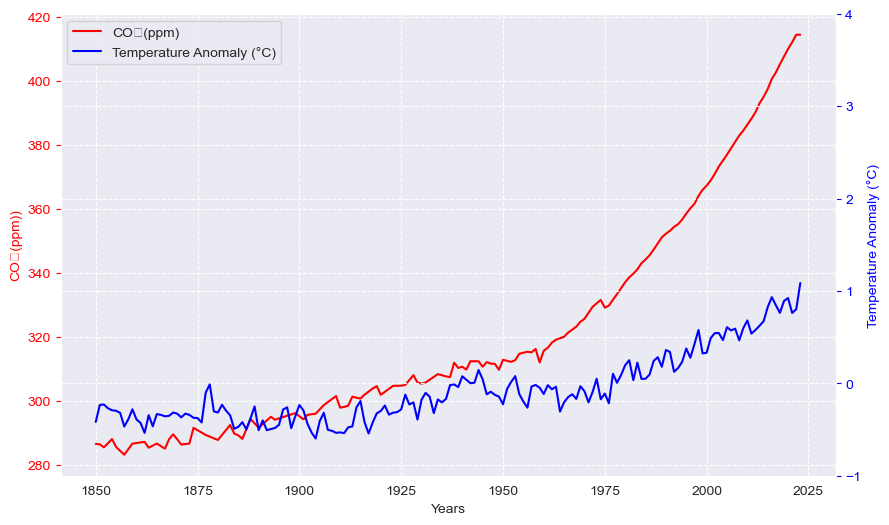

In [255]:
# Plot both CO2 and temp on the same plot with two y axis since 1850

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(lag['Year'], lag['CO2(ppmv)'], "red", label= "CO2(ppm)") 
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2(ppm))', color='red')
ax1.tick_params('y', colors='red')
#ax1.get_legend_handles_labels()

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(lag['Year'], lag['Global Anomaly'], color='blue', label='Temperature Anomaly (\u00b0C)')
ax2.set_ylabel('Temperature Anomaly (\u00b0C)', color='blue')
ax2.set_ylim(-1, 4)
ax2.tick_params('y', colors='blue')

# Combining legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

The above plot seems to confirm what Peter Hildebrand said. The CO2 rise precedes the rise in temperature. I will look at a previous warm period in the record below.

In [256]:
# Look at the data from 420kyr to 450kyr ago


historic_warm = int_climate.iloc[7898:8010]
historic_warm

,Year,CO2(ppmv),CH4,temp,Irish Anomaly,Global Anomaly
7898,-423278,269.133333,502.800000,-55.050000,NaN,NaN
7899,-423418,269.550000,505.250000,-55.150000,NaN,NaN
7900,-423663,269.966667,507.700000,-55.350000,NaN,NaN
7901,-423696,270.383333,494.925000,-55.550000,NaN,NaN
7902,-423790,270.800000,482.150000,-55.850000,NaN,NaN
...,...,...,...,...,...,...
8005,-450901,204.150000,416.866667,-61.050000,NaN,NaN
8006,-451404,203.400000,421.600000,-61.350000,NaN,NaN
8007,-451474,202.650000,426.333333,-61.683333,NaN,NaN
8008,-451825,201.900000,446.222222,-62.016667,NaN,NaN


c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\kolea\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


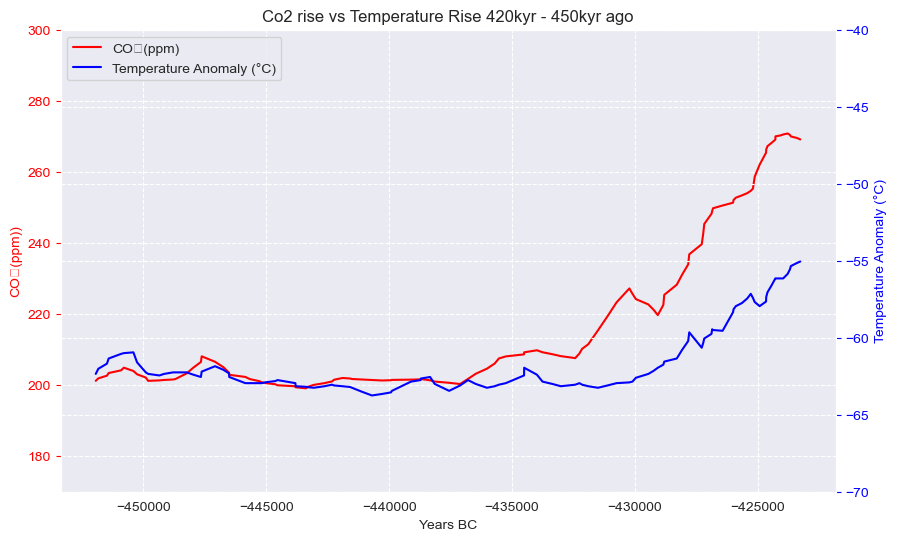

In [258]:
# Plot both CO2 and temp on the same plot with two y axis

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(historic_warm['Year'], historic_warm['CO2(ppmv)'], "red", label= "CO2(ppm)") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years BC')
ax1.set_ylim(170, 300)
ax1.set_ylabel('CO2(ppm))', color='red')
ax1.tick_params('y', colors='red')
#ax1.get_legend_handles_labels()

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(historic_warm['Year'], historic_warm['temp'], color='blue', label='Temperature Anomaly (\u00b0C)')
ax2.set_ylabel('Temperature Anomaly (\u00b0C)', color='blue')
ax2.set_ylim(-70, -40)
ax2.tick_params('y', colors='blue')

plt.title('Co2 rise vs Temperature Rise 420kyr - 450kyr ago')

#Combining legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

Despite what the climate scientists have said about temperature rises leading CO2 increases in previous warm periods, this does not seem to be the case with my data above. From the plot above, CO2 levels seem to increase from 432.5kyrs bc and temperature then increases 2500 years later. It looks as though temperature is lagging behind. I will check the same for Methane below.

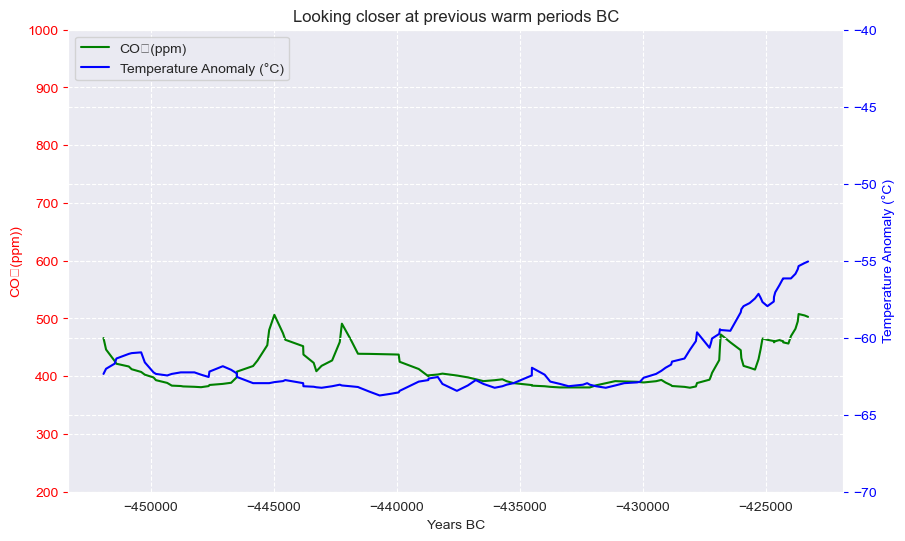

In [259]:
# Plot both CH4 and temp on the same plot with two y axis since 1850

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(historic_warm['Year'], historic_warm['CH4'], "green", label= "CO2(ppm)") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years BC')
ax1.set_ylim(200, 1000)
ax1.set_ylabel('CO2(ppm))', color='red')
ax1.tick_params('y', colors='red')
#ax1.get_legend_handles_labels()

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(historic_warm['Year'], historic_warm['temp'], color='blue', label='Temperature Anomaly (\u00b0C)')
ax2.set_ylabel('Temperature Anomaly (\u00b0C)', color='blue')
ax2.set_ylim(-70, -40)
ax2.tick_params('y', colors='blue')

plt.title('Looking closer at previous warm periods BC')

#Combining legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

In this case you can a temperature rise leading methane. There is an uptick in the temperature around 430kyr bc and then methane follows suit about 2,500 years later. Perhaps for this warming period a rise in CO2 lead to temperature going up which in turn caused other green house gases to be released. 

In [260]:
int_climate['lag_co2'] = int_climate['CO2(ppmv)'].shift(-7) #Shifting co2 values down 7 rows which equates to around 2500 years
#int_climate

historic_lag = int_climate.iloc[7898:8010] # same period as before 420kyr to 450kyr bc
historic_lag

,Year,CO2(ppmv),CH4,temp,Irish Anomaly,Global Anomaly,lag_co2
7898,-423278,269.133333,502.800000,-55.050000,NaN,NaN,270.000
7899,-423418,269.550000,505.250000,-55.150000,NaN,NaN,269.080
7900,-423663,269.966667,507.700000,-55.350000,NaN,NaN,268.160
7901,-423696,270.383333,494.925000,-55.550000,NaN,NaN,267.240
7902,-423790,270.800000,482.150000,-55.850000,NaN,NaN,266.320
...,...,...,...,...,...,...,...
8005,-450901,204.150000,416.866667,-61.050000,NaN,NaN,199.100
8006,-451404,203.400000,421.600000,-61.350000,NaN,NaN,198.400
8007,-451474,202.650000,426.333333,-61.683333,NaN,NaN,197.125
8008,-451825,201.900000,446.222222,-62.016667,NaN,NaN,195.850


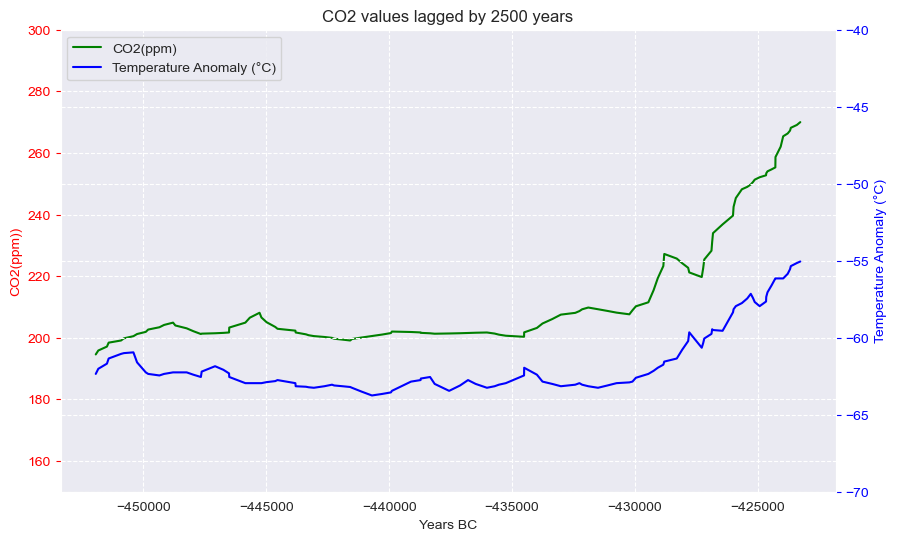

In [262]:
# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(historic_lag['Year'], historic_lag['lag_co2'], "green", label= "CO2(ppm)") #https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
ax1.set_xlabel('Years BC')
ax1.set_ylim(150, 300)
ax1.set_ylabel('CO2(ppm))', color='red')
ax1.tick_params('y', colors='red')
#ax1.get_legend_handles_labels()

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(historic_lag['Year'], historic_lag['temp'], color='blue', label='Temperature Anomaly (\u00b0C)')
ax2.set_ylabel('Temperature Anomaly (\u00b0C)', color='blue')
ax2.set_ylim(-70, -40)
ax2.tick_params('y', colors='blue')

plt.title('CO2 values lagged by 2500 years')

#Combining legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

Now the increase for both temperature and CO2 seems to happen around the same time, although the increase of CO2 happens at a faster rate.  Based on this analysis it appears CO2 leads temperature by about 2,500 years.  This seems to be a long lead in time. Its important to note that this is for preindustrial time. 

# Regression

Linear regression is a process of determining  a line that best represents the general trend of a dataset [[39]](https://www.britannica.com/topic/linear-regression). "The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable." [[40]](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)

The common interpretation of man made climate change is that modern-human activity (fossil fuels, agriculture etc.) drives the production of greenhouse gases which in turn leads to an increase in global temperature. As such I am going to split my variables into 2 sets; Predictor variables (Years, CO2, and CH4) and the target variable (Temperature) and then attempt to model the relationship between these. 

In [263]:
#There needs to be the same amount of values in each variable.

regression_df = int_climate.head(175)
regression_df

,Year,CO2(ppmv),CH4,temp,Irish Anomaly,Global Anomaly,lag_co2
0,2023,414.420000,1891.47,NaN,1.693996,1.085856,400.599167
1,2022,414.420000,1891.47,NaN,1.693996,0.801305,397.451667
2,2021,412.072500,1891.47,NaN,1.309830,0.761906,395.030833
3,2020,409.990833,1891.47,NaN,1.105663,0.922921,393.000000
4,2019,407.631667,1882.55,NaN,1.225663,0.891073,390.242500
...,...,...,...,...,...,...,...
170,1854,288.050000,780.70,-56.12,0.099064,-0.291521,285.230000
171,1853,286.760000,783.10,-55.99,0.298862,-0.270354,283.620000
172,1852,285.470000,785.50,-55.86,0.498660,-0.229399,283.355000
173,1851,286.395000,781.14,-55.73,0.434903,-0.233350,281.580000


In [264]:
predictor = regression_df[['Year', 'CO2(ppmv)', 'CH4']]
target = regression_df[['Global Anomaly']]

In [265]:
# Splitting the data into training and testing 
pred_train, pred_test, target_train, target_test = train_test_split(predictor, target, test_size=0.2, random_state=5) # 0.2 for test size means it will eb trained on 20% of data, random state gives ti a seed to make it reproducible
pred_test.dtypes

Year           int64
CO2(ppmv)    float64
CH4          float64
dtype: object

In [266]:
# Creating a linear regression model
model = LinearRegression()

In [267]:
# Fitting the model on the training data
model.fit(pred_train, target_train)

LinearRegression()

In [268]:
predictions = model.predict(pred_test)
predictions

array([[-0.39325491],
       [ 0.11664698],
       [ 0.8795336 ],
       [ 0.53195193],
       [-0.34032021],
       [-0.09962503],
       [-0.24470497],
       [ 0.13853191],
       [-0.23282391],
       [-0.25861881],
       [-0.34722876],
       [-0.06281188],
       [-0.32125819],
       [ 0.01016498],
       [-0.1620159 ],
       [ 0.36862923],
       [-0.0171015 ],
       [ 0.08821699],
       [ 0.30776482],
       [ 0.44423558],
       [-0.37433401],
       [-0.08985391],
       [-0.17717363],
       [-0.22837562],
       [ 0.34080451],
       [-0.32225284],
       [ 0.07062393],
       [-0.191611  ],
       [-0.07983936],
       [-0.32580952],
       [ 0.40394099],
       [-0.21725486],
       [ 0.92868823],
       [-0.31869616],
       [-0.30868275]])

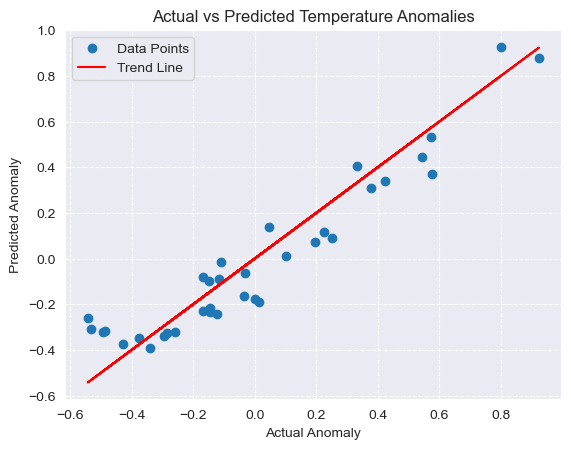

In [269]:
plt.scatter(target_test, predictions)
plt.plot(target_test, target_test, 'r')   # a trend line for perfect correlation
plt.xlabel('Actual Anomaly')
plt.ylabel('Predicted Anomaly')
plt.title('Actual vs Predicted Temperature Anomalies')
plt.legend(['Data Points', 'Trend Line'])
plt.show()

The regression model above shows a very strong correlation between the predicted anomaly values and the actual ones.  It means it is working well. Using the model it should be possible to predict future temperature changes if we have data on future CO2 and CH4 levels. 

# Creating future datapoints

The University of Melbourne has published comprehensive factsheets and datasets for atmospheric surface concentrations of 43 different greenhouse gases with both historic (from 2000 years ago) and estimated future (up to the year 2500) values [[41]](https://greenhousegases.science.unimelb.edu.au/#!/view)

When evaluating the appropriate response to climate change the Intergovernmental Panel on Climate Change (IPCC) look at 5 different “Shared Socioeconomic Pathways” (SSPs). These SSP's look at different ways in which the world might evolve in the absence of climate policy and how different levels of climate change mitigation could be achieved [[42]](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/). 

The future datasets for greenhouse gases vary by scenario. I will take a dataset for 5 of the SSPs, the mildest SSP1, the middle of the road SSP3 and the most extreme SSP5

I will then use my own regression model to predict how temperature will change based on this.

**SSP1 Sustainability ("Taking the Green Road")**

This scenario models a future with high economic growth, low inequality and a strong emphasis on environmental sustainability. Consumption is oriented toward low material growth and lower resource and energy intensity. There is widespread adoption of green technology, a focus on renewable energy, and effective global cooperation on environmental issues. [[43]](https://en.wikipedia.org/wiki/Shared_Socioeconomic_Pathways)

In [270]:
# SSP1 CO2

co2_ssp1 = pd.read_csv('Datasets Used/SSP1_CO2_2015-2500.csv', skiprows=8, usecols=(0,1)) # only want columns year and global mean from 2023 on
co2_ssp1.columns = ['Year', 'CO2(ppmv)']
co2_ssp1

,Year,CO2(ppmv)
0,2023,422.169967
1,2024,424.442968
2,2025,426.524970
3,2026,428.425971
4,2027,430.150972
...,...,...
473,2496,336.940000
474,2497,336.918000
475,2498,336.896000
476,2499,336.874000


In [271]:
# SSP1 CH4

ch4_ssp1 = pd.read_csv('Datasets Used/SSP1_CH4_2015-2500.csv', skiprows= 8, usecols=(0,1)) # only want columns year and global mean from 2023 on
ch4_ssp1.columns = ['Year', 'CH4']
ch4_ssp1

,Year,CH4
0,2023,1891.159452
1,2024,1884.499312
2,2025,1875.249181
3,2026,1863.579057
4,2027,1849.658949
...,...,...
473,2496,871.387904
474,2497,871.390904
475,2498,871.394904
476,2499,871.398904


In [272]:
ssp1 = pd.merge(co2_ssp1, ch4_ssp1, on='Year', how='outer')
ssp1 = ssp1.iloc[:-400] #only want years up until 2100
ssp1

,Year,CO2(ppmv),CH4
0,2023,422.169967,1891.159452
1,2024,424.442968,1884.499312
2,2025,426.524970,1875.249181
3,2026,428.425971,1863.579057
4,2027,430.150972,1849.658949
...,...,...,...
73,2096,398.407010,1055.089651
74,2097,397.206010,1050.079672
75,2098,395.989011,1045.309679
76,2099,394.756011,1040.739691


In [273]:
#using model previously trained on data up to 2022

#ssp1_reshaped = ssp1.reshape(-1, 1)
ssp1_pred = model.predict(ssp1[['Year', 'CO2(ppmv)',	'CH4']])
ssp1_pred

array([[1.01795742],
       [1.04307266],
       [1.06589913],
       [1.08655738],
       [1.10510958],
       [1.12162932],
       [1.13617787],
       [1.14879313],
       [1.1595249 ],
       [1.16876052],
       [1.17682738],
       [1.18368954],
       [1.18937017],
       [1.1938331 ],
       [1.19711298],
       [1.19917408],
       [1.20005082],
       [1.19974275],
       [1.19824923],
       [1.19587588],
       [1.19288095],
       [1.1892523 ],
       [1.18495443],
       [1.17998648],
       [1.17434801],
       [1.16802668],
       [1.16101081],
       [1.15331098],
       [1.14492742],
       [1.13620301],
       [1.12746935],
       [1.11867884],
       [1.10981891],
       [1.1008534 ],
       [1.09178168],
       [1.08256801],
       [1.07322322],
       [1.06371159],
       [1.05404438],
       [1.04424452],
       [1.03434642],
       [1.02434966],
       [1.01424232],
       [1.00402376],
       [0.99368185],
       [0.98321637],
       [0.97260351],
       [0.961

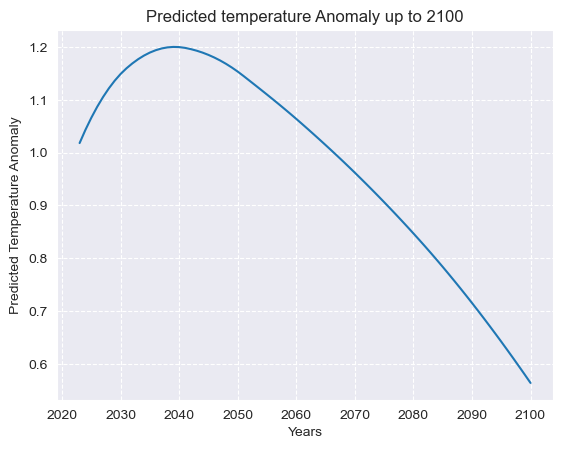

In [275]:
plt.plot(ssp1['Year'], ssp1_pred)
plt.xlabel('Years')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Predicted temperature Anomaly up to 2100')
plt.show()

This is hard to put in context in isolation. I will plot beside temperature anomaly data from 1800-2022

In [276]:
last_200_years = int_climate.iloc[:44]
last_200_years

,Year,CO2(ppmv),CH4,temp,Irish Anomaly,Global Anomaly,lag_co2
0,2023,414.420000,1891.470000,NaN,1.693996,1.085856,400.599167
1,2022,414.420000,1891.470000,NaN,1.693996,0.801305,397.451667
2,2021,412.072500,1891.470000,NaN,1.309830,0.761906,395.030833
3,2020,409.990833,1891.470000,NaN,1.105663,0.922921,393.000000
4,2019,407.631667,1882.550000,NaN,1.225663,0.891073,390.242500
5,2018,405.218333,1871.530000,NaN,1.086496,0.762654,388.178333
6,2017,402.595833,1865.500000,NaN,1.303163,0.845174,386.332500
7,2016,400.599167,1861.330000,NaN,1.061496,0.932927,384.451667
8,2015,397.451667,1851.960000,NaN,0.803348,0.825114,382.907500
9,2014,395.030833,1841.420000,NaN,1.419089,0.672872,380.908333


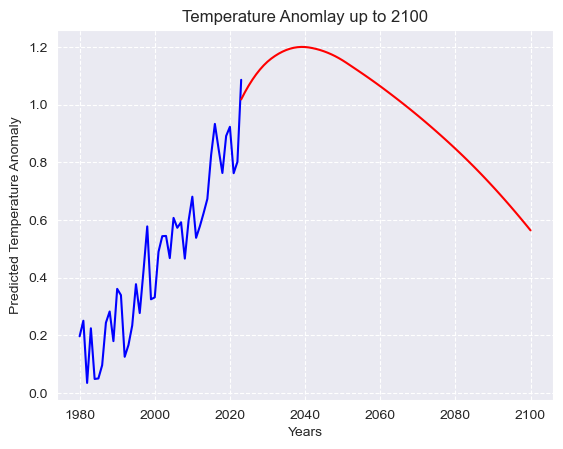

In [277]:
plt.plot(last_200_years['Year'], last_200_years['Global Anomaly'], 'b', label= 'Actual Values')
plt.plot(ssp1['Year'], ssp1_pred, 'r', label=('Predicted Values'))
#plt.ylim(4, 20)
plt.xlabel('Years')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Temperature Anomaly up to 2100 under SSP1')
plt.show()

Under this scenario my prediction model forecasts temperatures will peak in 2040 before a slow decline. 

**SSP3: Regional Rivalry "A Rocky Road"**

This scenario assumes a future where there is high regional competition and limited international cooperation. Economic development is uneven, with some regions experiencing rapid growth, while others lag behind. Population growth is low in industrialized and high in developing countries. A low international priority for addressing environmental concerns leads to strong environmental degradation in some regions [[44]](https://www.sciencedirect.com/science/article/pii/S0959378016300681?via%3Dihub#sec0035)


In [279]:
# SSP3 CO2

co2_ssp3 = pd.read_csv('Datasets Used/SSP3_CO2_2015-2500.csv', skiprows=8, usecols=(0,1)) # only want columns year and global mean from 2023 on
co2_ssp3.columns = ['Year', 'CO2(ppmv)']
co2_ssp3


,Year,CO2(ppmv)
0,2023,425.282955
1,2024,428.783954
2,2025,432.346954
3,2026,435.974953
4,2027,439.669952
...,...,...
473,2496,1372.870000
474,2497,1372.370000
475,2498,1371.870000
476,2499,1371.380000


In [280]:
# SSP3 CH4

ch4_ssp3 = pd.read_csv('Datasets Used/SSP3_CH4_2015-2500.csv', skiprows=8, usecols=(0,1)) # only want columns year and global mean from 2023 on
ch4_ssp3.columns = ['Year', 'CH4']
ch4_ssp3



,Year,CH4
0,2023,1971.401092
1,2024,1988.791112
2,2025,2006.511129
3,2026,2024.531144
4,2027,2042.821162
...,...,...
473,2496,1939.030052
474,2497,1938.860050
475,2498,1938.680049
476,2499,1938.500064


In [281]:
ssp3 = pd.merge(co2_ssp3, ch4_ssp3, on='Year', how='outer')
ssp3 = ssp3.iloc[:-400] #only want years up until 2100
ssp3

,Year,CO2(ppmv),CH4
0,2023,425.282955,1971.401092
1,2024,428.783954,1988.791112
2,2025,432.346954,2006.511129
3,2026,435.974953,2024.531144
4,2027,439.669952,2042.821162
...,...,...,...
73,2096,834.266920,3307.831145
74,2097,842.366919,3324.061145
75,2098,850.553919,3340.201141
76,2099,858.828918,3356.241134


In [282]:
#using model previously trained on data up to 2022

#ssp1_reshaped = ssp1.reshape(-1, 1)
ssp3_pred = model.predict(ssp3[['Year', 'CO2(ppmv)',	'CH4']])
ssp3_pred

array([[1.05608806],
       [1.09607953],
       [1.13680284],
       [1.1782924 ],
       [1.22057095],
       [1.26363827],
       [1.30751707],
       [1.35221861],
       [1.39775415],
       [1.44396869],
       [1.49071915],
       [1.538017  ],
       [1.58590942],
       [1.63440789],
       [1.683536  ],
       [1.73330543],
       [1.78373957],
       [1.8348382 ],
       [1.8866485 ],
       [1.9390536 ],
       [1.99201864],
       [2.04553215],
       [2.09964068],
       [2.15433275],
       [2.20963151],
       [2.26554888],
       [2.32210801],
       [2.3793089 ],
       [2.43717494],
       [2.49564919],
       [2.55470916],
       [2.61436632],
       [2.67464426],
       [2.73553085],
       [2.79706116],
       [2.85924666],
       [2.92207545],
       [2.98558281],
       [3.04975661],
       [3.1146092 ],
       [3.18012866],
       [3.24631544],
       [3.31320395],
       [3.38077102],
       [3.44903983],
       [3.51802182],
       [3.58771724],
       [3.658

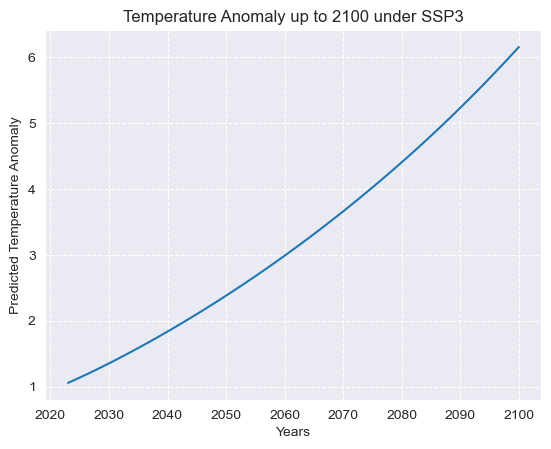

In [283]:
plt.plot(ssp3['Year'], ssp3_pred)
plt.xlabel('Years')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Temperature Anomaly up to 2100 under SSP3')
plt.show()

Even though SSP3 is the middle of 5 scenarios it does not project any optimism. There is no curtailing of the temperature this century. The temperature anomaly blows past the targeted maximum set out under the Paris agreement by the late 2030s.

**SSP5: Fossil-fueled Development "Taking the Highway"**

"This scenario places increasing faith in competitive markets, innovation and participatory societies to produce rapid technological progress and development of human capital as the path to sustainable development...... .... . All these factors lead to rapid growth of the global economy, while global population peaks and declines in the 21st century. Local environmental problems like air pollution are successfully managed. There is faith in the ability to effectively manage social and ecological systems, including by geo-engineering if necessary" [[43]]


In [289]:
# SSP5 CO2

co2_ssp5 = pd.read_csv('Datasets Used/SSP5_CO2_2015-2500.csv', skiprows=8, usecols=(0,1)) # only want columns year and global mean from 2023 on
co2_ssp5.columns = ['Year', 'CO2(ppmv)']
co2_ssp5

,Year,CO2(ppmv)
0,2023,424.720956
1,2024,428.219955
2,2025,431.829954
3,2026,435.549953
4,2027,439.377952
...,...,...
473,2496,2012.340000
474,2497,2011.670000
475,2498,2011.010000
476,2499,2010.360000


In [290]:
# SSP5 ch4

ch4_ssp5 = pd.read_csv('Datasets Used/SSP5_CH4_2015-2500.csv', skiprows=8, usecols=(0,1)) # only want columns year and global mean from 2023 on
ch4_ssp5.columns = ['Year', 'CH4']
ch4_ssp5

,Year,CH4
0,2023,1933.390697
1,2024,1943.570741
2,2025,1954.490779
3,2026,1966.100815
4,2027,1978.350845
...,...,...
473,2496,1019.619941
474,2497,1019.449941
475,2498,1019.279940
476,2499,1019.109952


In [291]:
ssp5 = pd.merge(co2_ssp5, ch4_ssp5, on='Year', how='outer')
ssp5 = ssp5.iloc[:-400] #only want years up until 2100
ssp5

,Year,CO2(ppmv),CH4
0,2023,424.720956,1933.390697
1,2024,428.219955,1943.570741
2,2025,431.829954,1954.490779
3,2026,435.549953,1966.100815
4,2027,439.377952,1978.350845
...,...,...,...
73,2096,1080.529868,2465.519387
74,2097,1094.209868,2452.609397
75,2098,1107.889868,2439.949409
76,2099,1121.549869,2427.529418


In [292]:
#using model previously trained on data up to 2022

ssp5_pred = model.predict(ssp5[['Year', 'CO2(ppmv)',	'CH4']])
ssp5_pred

array([[1.0486925 ],
       [1.08850375],
       [1.12962848],
       [1.17205393],
       [1.21575562],
       [1.26074373],
       [1.30701737],
       [1.354564  ],
       [1.4034059 ],
       [1.45368165],
       [1.50554085],
       [1.55895775],
       [1.61394185],
       [1.67049119],
       [1.72862721],
       [1.78833667],
       [1.84964101],
       [1.91256229],
       [1.97709921],
       [2.04333635],
       [2.11134814],
       [2.18114627],
       [2.25274242],
       [2.32615997],
       [2.40139871],
       [2.47848243],
       [2.55743432],
       [2.63826582],
       [2.72098907],
       [2.80581759],
       [2.8929197 ],
       [2.98228676],
       [3.07394431],
       [3.16789474],
       [3.26414068],
       [3.36270723],
       [3.46360803],
       [3.56686822],
       [3.67248973],
       [3.78047455],
       [3.8908127 ],
       [4.00354057],
       [4.11865989],
       [4.23621807],
       [4.35621641],
       [4.47867938],
       [4.60364292],
       [4.731

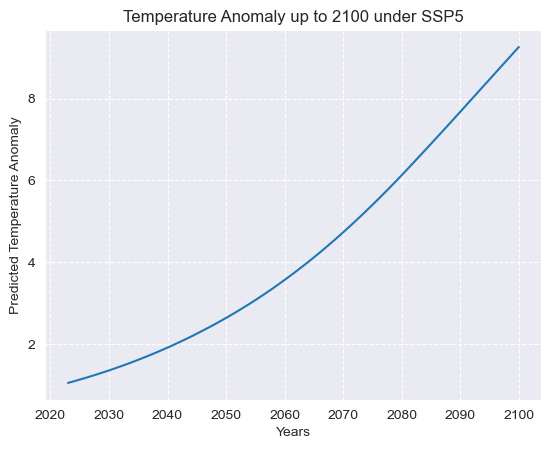

In [293]:
plt.plot(ssp5['Year'], ssp5_pred)
plt.xlabel('Years')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Temperature Anomaly up to 2100 under SSP5')
plt.show()

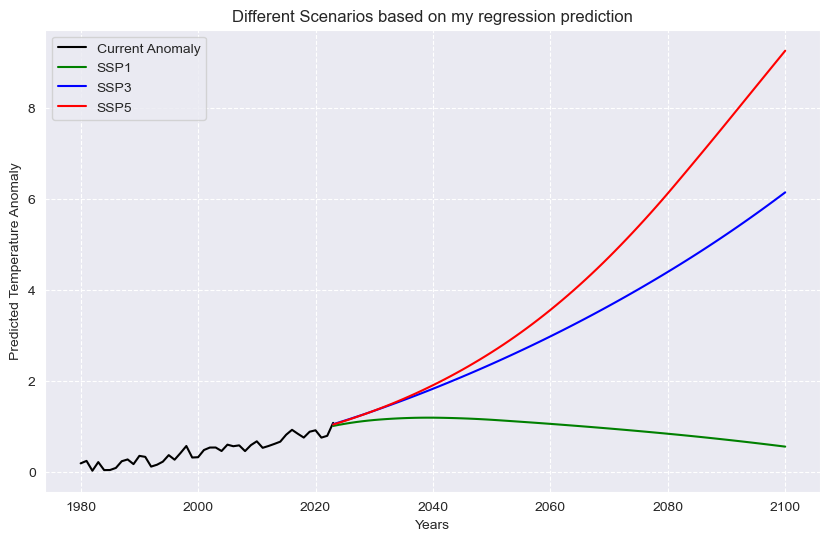

In [ ]:
# Plot all 3 scenarios together
plt.subplots(figsize=(10, 6))

plt.plot(last_200_years['Year'], last_200_years['Global Anomaly'], 'black', label= 'Current Anomaly')
plt.plot(ssp1['Year'], ssp1_pred, 'green', label=('SSP1'))
plt.plot(ssp3['Year'], ssp3_pred, 'blue', label=('SSP3'))
plt.plot(ssp5['Year'], ssp5_pred, 'red', label=('SSP5'))
#plt.ylim(4, 20)
plt.xlabel('Years')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Different Scenarios based on my regression prediction')
plt.legend()
plt.show()

# Conclusion

During this project I have given a brief introduction to the problem of global warming, specifically surrounding the impact of greenhouse gases on the global temperature and more locally on Ireland's temperature.

I have examined the relationship between CO2, Methane and temperature, showing there is high correlation between them.  Using regression I have built a model that was trained pre-established data that can be used to predict increases in temperature based on the levels of greenhouse gas emissions. 

Based on these predictions I find it hard to believe that human society as a whole will be able to curtail their emissions in order keep the temperature within the 1.5 degree Celsius anomaly that has been set out in international agreements. Reading the descriptions of the shared socioeconomic pathways it is difficult to see many aspects of SSP1 manifesting in global politics as we know it today. Indeed, the descriptions of SSP3, which leads to an increase of 6 degrees this century seem more recognizable.

However this project showcases the powerful tools available for analyzing historical trends and making informed predictions about future climate behavior. The utilization of regression modeling and data analysis techniques has enabled a deeper understanding of the intricate relationships between greenhouse gas emissions and global temperatures. As we navigate the challenges posed by global warming, these analytical tools become indispensable for policymakers, researchers, and communities alike.

# References

***

**Sources that are directly quoted;**

- [1]	A. Dewan, K. Shveda, and L. Robinson, “World is dangerously close to a global warming limit as 2023 goes down as hottest on record,” CNN, 09-Jan-2024.
- [2]	“Copernicus: 2023 is the hottest year on record, with global temperatures close to the 1.5°C limit,” Copernicus.eu. [Online]. Available: https://climate.copernicus.eu/copernicus-2023-hottest-year-record. [Accessed: 11-Jan-2024].
- [3]	H. Shaftel, “What is climate change?,” Climate Change: Vital Signs of the Planet. [Online]. Available: https://climate.nasa.gov/what-is-climate-change/. [Accessed: 11-Jan-2024].
- [4]	B. Bereiter et al., “Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present,” Geophys. Res. Lett., vol. 42, no. 2, pp. 542–549, 2015.
- [5]	Wikipedia contributors, “European Project for Ice Coring in Antarctica,” Wikipedia, The Free Encyclopedia, 15-Jan-2023. [Online]. Available: https://en.wikipedia.org/w/index.php?title=European_Project_for_Ice_Coring_in_Antarctica&oldid=1133758237.
- [6]	National Centers for Environmental Information (NCEI), “No title,” Noaa.gov. [Online]. Available: https://www.ncei.noaa.gov/access/paleo-search/study/2443. [Accessed: 11-Jan-2024].
-[7]	D. Lüthi et al., “High-resolution carbon dioxide concentration record 650,000–800,000 years before present,” Nature, vol. 453, no. 7193, pp. 379–382, 2008.
- [8]	M. Rubino et al., “A revised 1000 year atmospheric δ13C‐CO2 record from Law Dome and South Pole, Antarctica,” J. Geophys. Res., vol. 118, no. 15, pp. 8482–8499, 2013.
-[9]	R. Röthlisberger, M. Bigler, E. W. Wolff, F. Joos, E. Monnin, and M. A. Hutterli, “Ice core evidence for the extent of past atmospheric CO2 change due to iron fertilisation,” Geophys. Res. Lett., vol. 31, no. 16, 2004.
- [10]	J. Ahn et al., “Atmospheric CO2 over the last 1000 years: A high‐resolution record from the West Antarctic Ice Sheet (WAIS) Divide ice core,” Global Biogeochem. Cycles, vol. 26, no. 2, 2012.
- [11]	J. Ahn and E. J. Brook, “Siple Dome ice reveals two modes of millennial CO2 change during the last ice age,” Nat. Commun., vol. 5, no. 1, 2014.
- [12]	S. Eggleston, J. Schmitt, B. Bereiter, R. Schneider, and H. Fischer, “Evolution of the stable carbon isotope composition of atmospheric CO2 over the last glacial cycle,” Paleoceanography, vol. 31, no. 3, pp. 434–452, 2016.
- [13]	J. R. Petit et al., “Climate and atmospheric history of the past 420,000 years from the Vostok ice core, Antarctica,” Nature, vol. 399, no. 6735, pp. 429–436, 1999.
- [14]	“South Pole is last place on Earth to pass global warming milestone,” Noaa.gov. [Online]. Available: https://www.noaa.gov/south-pole-last-place-on-earth-to-pass-global-warming-milestone. [Accessed: 11-Jan-2024].
- [15]	“No title,” Noaa.gov. [Online]. Available: https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/. [Accessed: 11-Jan-2024].
- [16]	Wikipedia contributors, “Industrial Revolution,” Wikipedia, The Free Encyclopedia, 22-Dec-2023. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Industrial_Revolution&oldid=1191252811.
- [17]	“How are past temperatures determined from an ice core?,” Scientific American.
- [18]	J. Stoller-Conrad, “Core questions: An introduction to ice cores,” Climate Change: Vital Signs of the Planet, 14-Aug-2017. [Online]. Available: https://climate.nasa.gov/news/2616/core-questions-an-introduction-to-ice-cores/. [Accessed: 11-Jan-2024].
- [19]	D. Veres et al., “The Antarctic ice core chronology (AICC2012): an optimized multi-parameter and multi-site dating approach for the last 120 thousand years,” Clim. Past, vol. 9, no. 4, pp. 1733–1748, 2013.
- [20]	J. Jouzel et al., “Orbital and millennial Antarctic climate variability over the past 800,000 years,” Science, vol. 317, no. 5839, pp. 793–796, 2007.
- [21]	“2022 antarctic MERRA-2 temperature,” Nasa.gov. [Online]. Available: https://ozonewatch.gsfc.nasa.gov/meteorology/temp_2022_MERRA2_SH.html. [Accessed: 11-Jan-2024].
- [22]	M. I. Ncei., “Did you know?,” Noaa.gov. [Online]. Available: https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature. [Accessed: 11-Jan-2024].
- [23]	C. Morice et al., “Hadley centre and Climatic Research Unit surface temperature dataset version 5.” 18-Dec-2020.
- [24]	“Global land-ocean surface temperature data: HadCRUT5,” Ucar.edu. [Online]. Available: https://climatedataguide.ucar.edu/climate-data/global-land-ocean-surface-temperature-data-hadcrut5. [Accessed: 11-Jan-2024].
- [25]	O. Us Epa, “Overview of greenhouse gases,” 2015.
- [26]	Epa.gov. [Online]. Available: https://www.epa.gov/system/files/other-files/2022-07/ghg-concentrations_fig-2.csv. [Accessed: 11-Jan-2024].
- [27]	“Long term data sets,” Met.ie. [Online]. Available: https://www.met.ie/climate/available-data/long-term-data-sets. [Accessed: 11-Jan-2024].
- [28]	“No title,” Cso.ie. [Online]. Available: https://data.cso.ie/. [Accessed: 11-Jan-2024].
- [29]	“The harsh winter of 1962/1963,” Irishidentity.com. [Online]. Available: http://www.irishidentity.com/extras/weather/stories/196263.htm. [Accessed: 11-Jan-2024].
- [30]	“The extreme cold spell of November -December 2010,” Met.ie. [Online]. Available: https://www.met.ie/cms/assets/uploads/2017/08/ColdSpell10.pdf. [Accessed: 11-Jan-2024].
- [31]	Wikipedia contributors, “1995 British isles heatwave,” Wikipedia, The Free Encyclopedia, 19-Aug-2023. [Online]. Available: https://en.wikipedia.org/w/index.php?title=1995_British_Isles_heatwave&oldid=1171211261.
- [32]	Wikipedia contributors, “Correlation,” Wikipedia, The Free Encyclopedia, 22-Dec-2023. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Correlation&oldid=1191281672.
- [33]	S. Turney, “Pearson correlation coefficient (r),” Scribbr, 13-May-2022. [Online]. Available: https://www.scribbr.com/statistics/pearson-correlation-coefficient/. [Accessed: 11-Jan-2024].
- [34]	A. amnindersingh1414 Follow, “How to implement linear interpolation in Python?,” GeeksforGeeks, 30-Mar-2021. [Online]. Available: https://www.geeksforgeeks.org/how-to-implement-linear-interpolation-in-python/. [Accessed: 11-Jan-2024].
- [35]	R. Agrawal, “Interpolation techniques guide & benefits,” Analytics Vidhya, 01-Jun-2021. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/. [Accessed: 11-Jan-2024].
- [36]	“CO2 lags temperature - what does it mean?,” Skeptical Science. [Online]. Available: https://skepticalscience.com/co2-lags-temperature.htm. [Accessed: 11-Jan-2024].
- [37]	A. Buis and NASA’s Jet Propulsion Laboratory, “Milankovitch (orbital) cycles and their role in Earth’s climate,” Climate Change: Vital Signs of the Planet, 27-Feb-2020. [Online]. Available: https://climate.nasa.gov/news/2948/milankovitch-orbital-cycles-and-their-role-in-earths-climate/. [Accessed: 11-Jan-2024].
- [38]	N. Goddard, “NASA | ask a climate scientist: CO2 and temperature,” 24-Sep-2013. [Online]. Available: https://www.youtube.com/watch?v=7OgQBlJimS8. [Accessed: 11-Jan-2024].
- [39]	K. Stewart, “linear regression,” Encyclopedia Britannica. 07-Dec-2023.
- [40]	“What is linear regression?,” Statistics Solutions, 21-Dec-2010. [Online]. Available: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/. [Accessed: 11-Jan-2024].
- [41]	“Greenhouse gas concentrations,” Edu.au. [Online]. Available: https://greenhousegases.science.unimelb.edu.au/#!/view. [Accessed: 11-Jan-2024].
- [42]	T. Harrisson, “Explainer: How ‘Shared Socioeconomic Pathways’ explore future climate change,” Carbon Brief, 19-Apr-2018. [Online]. Available: https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/. [Accessed: 11-Jan-2024].
- [43]	Wikipedia contributors, “Shared Socioeconomic Pathways,” Wikipedia, The Free Encyclopedia, 04-Jan-2024. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Shared_Socioeconomic_Pathways&oldid=1193549622.
- [44]	K. Riahi et al., “The Shared Socioeconomic Pathways and their energy, land use, and greenhouse gas emissions implications: An overview,” Glob. Environ. Change, vol. 42, pp. 153–168, 2017.


**Sources used for general understanding;**

- [45]	“Current & historical carbon dioxide (CO2) levels graph,” Co2levels.org. [Online]. Available: https://www.co2levels.org/. [Accessed: 11-Jan-2024].
- [46]	L. Perkins, G. A. Schmidt, and K. Gaeta, “NASA scientific visualization studio,” SVS, 12-Jan-2023. [Online]. Available: https://svs.gsfc.nasa.gov/5060/. [Accessed: 11-Jan-2024].
- [47]	O. Us Epa, “Climate change indicators: Atmospheric concentrations of greenhouse gases,” 2016.
- [48]	Ipcc.ch. [Online]. Available: https://archive.ipcc.ch/ipccreports/tar/wg1/016.htm#:~:text=Compared%20to%20the%20relatively%20stable,consequence%20of%20CO2%20emissions. [Accessed: 11-Jan-2024].
- [49]	“Frequently Asked Questions,” Ipcc.ch. [Online]. Available: https://www.ipcc.ch/report/ar6/wg1/downloads/faqs/IPCC_AR6_WGI_FAQs_Compiled.pdf. [Accessed: 11-Jan-2024].
- [50]	R. M. Andrew, “A comparison of estimates of global carbon dioxide emissions from fossil carbon sources,” Earth Syst. Sci. Data, vol. 12, no. 2, pp. 1437–1465, 2020.
- [51]	H. Ritchie, P. Rosado, and M. Roser, “CO₂ and greenhouse gas emissions,” Our World in Data, 2023.
- [52]	National Centers for Environmental Information (NCEI), “Datasets,” Noaa.gov. [Online]. Available: https://www.ncdc.noaa.gov/cdo-web/datasets. [Accessed: 11-Jan-2024].
- [53]	US Department of Commerce, NOAA, and Global Monitoring Laboratory, “Global Monitoring Laboratory - carbon cycle greenhouse gases,” 2005.
- [54]	“Complete guide on time series analysis in python,” Kaggle.com, 30-Aug-2020. [Online]. Available: https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python. [Accessed: 11-Jan-2024].
- [55]	K. E. Muryshev, A. V. Eliseev, S. N. Denisov, I. I. Mokhov, M. M. Arzhanov, and A. V. Timazhev, “Time lag between changes in global temperature and atmospheric CO2 content under anthropogenic emissions of CO2 and CH4 into the atmosphere,” IOP Conf. Ser. Earth Environ. Sci., vol. 231, p. 012039, 2019.
- [56]	“How to embed image or picture in jupyter notebook, either from a local machine or from a web resource?,” Stack Overflow. [Online]. Available: https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o. [Accessed: 11-Jan-2024].
- [57]	Zach, “How to add an average line to plot in Matplotlib,” Statology, 23-Jun-2022. [Online]. Available: https://www.statology.org/matplotlib-average-line/. [Accessed: 11-Jan-2024].
- [58]	B. Henley and N. Abram, “The three-minute story of 800,000 years of climate change with a sting in the tail,” The Conversation, 12-Jun-2017.
- [59]	A. Stips, D. Macias, C. Coughlan, E. Garcia-Gorriz, and X. S. Liang, “On the causal structure between CO2 and global temperature,” Sci. Rep., vol. 6, no. 1, pp. 1–9, 2016.
- [60]	C. Mateus and A. Potito, “Long-term trends in daily extreme air temperature indices in Ireland from 1885 to 2018,” Weather Clim. Extrem., vol. 36, no. 100464, p. 100464, 2022.
- [61]	“How to Fix the Pandas UnicodeDecodeError utf8 codec cant decode bytes in position 01 invalid continuation byte Error,” Saturncloud.io, 19-Jun-2023. [Online]. Available: https://saturncloud.io/blog/how-to-fix-the-pandas-unicodedecodeerror-utf8-codec-cant-decode-bytes-in-position-01-invalid-continuation-byte-error/. [Accessed: 11-Jan-2024].
- [62]	F. Parrenin et al., “Synchronous change of atmospheric CO 2 and Antarctic temperature during the last deglacial warming,” Science, vol. 339, no. 6123, pp. 1060–1063, 2013.
- [63]	R. Python, “NumPy, SciPy, and pandas: Correlation With Python,” Realpython.com, 23-Dec-2019. [Online]. Available: https://realpython.com/numpy-scipy-pandas-correlation-python/. [Accessed: 11-Jan-2024].
- [64]	“An introduction to machine learning with,” scikit-learn. [Online]. Available: https://scikit-learn.org/stable/tutorial/basic/tutorial.html. [Accessed: 11-Jan-2024].
- [65]	R. Lindsey, “Climate change: Atmospheric carbon dioxide,” NOAA Climate.gov. [Online]. Available: https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide. [Accessed: 11-Jan-2024].
- [66]	A. Ganopolski and D. M. Roche, “On the nature of lead–lag relationships during glacial–interglacial climate transitions,” Quat. Sci. Rev., vol. 28, no. 27–28, pp. 3361–3378, 2009.


***
**END**